In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sn

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
df = adult.data.features 
y  = adult.data.targets.to_numpy() 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [3]:
# df = pd.read_csv('adult.data')
# df.head()

In [4]:
# df['charges'] = df['charges'].apply(lambda x: 1 if x >= 10000 else 0)
# df

In [5]:
# df['region'].value_counts()

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [7]:
unique, counts = np.unique(y, return_counts=True)
unique, counts

(array(['<=50K', '<=50K.', '>50K', '>50K.'], dtype=object),
 array([24720, 12435,  7841,  3846]))

In [8]:
y = list(y)
for i in range(len(y)):
    if y[i] == '<=50K' or y[i] == '<=50K.':
        y[i] = 0
    else:
        y[i] = 1
        
y = np.array(y)
np.unique(y)

array([0, 1])

In [9]:
df['income'] = y
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [10]:
df.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'native-country': 'country','hours-per-week': 'hours per week','marital-status': 'marital'}, inplace = True)

In [11]:
df.isin(['?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital              0
occupation        1843
relationship         0
race                 0
sex                  0
capital gain         0
capital loss         0
hours per week       0
country            583
income               0
dtype: int64

In [12]:
# code will replace the special character to nan and then drop the columns 
df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)
#dropping the NaN rows now 
df.dropna(how='any',inplace=True)

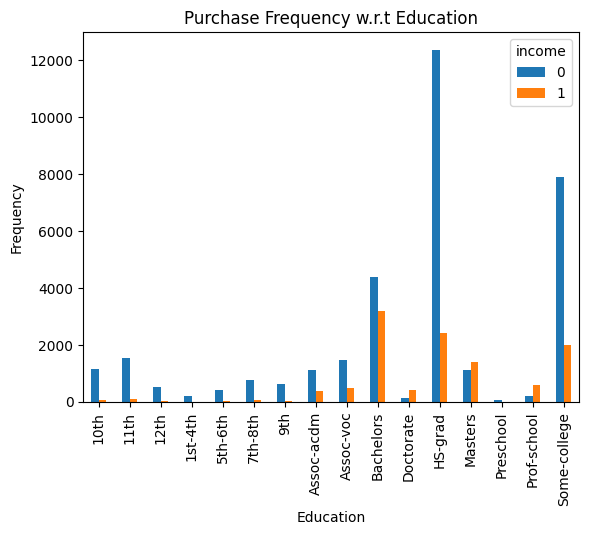

In [13]:
pd.crosstab(df.education,df.income).plot(kind='bar')
plt.title('Purchase Frequency w.r.t Education')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.show()

In [14]:
cat_cols = ['workclass', 'education', 'marital', \
            'occupation', 'relationship', 'race', 'sex', 'country']

In [15]:
def one_hot(df, cols): # idk if sklearns one-hot encoder is similar
    """
    df: pandas DataFrame
    param: cols a list of columns to encode
    return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

In [16]:
def numeric_scaler(df, cols):
    '''
    df: pandas dataframe
    numeric_cols: (array of strings) column names for numeric variables

    no return: does inplace operation
    '''
    df_new = df.copy()
    mmscaler = MinMaxScaler()
    df_new[cols] = mmscaler.fit_transform(df_new[cols])
    return df_new

In [17]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital,occupation,relationship,race,sex,capital gain,capital loss,hours per week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [18]:
y = df['income']
y

0        0
1        0
2        0
3        0
4        0
        ..
48836    0
48837    0
48839    0
48840    0
48841    1
Name: income, Length: 45222, dtype: int64

In [19]:
numeric_all = ['age', 'bmi', 'children', 'charges']
# cat_all = ['sex', 'smoker', 'region']
# df_medical_mm = numeric_scaler(df, numeric_all) # minmax scaling for all numeric columns, so all elements in [0,1]
df_medical_mm_oh = one_hot(df, cat_cols)
df_medical_mm_oh.drop(cat_cols, axis = 1, inplace=True) # drop categories that were used to one hot encode
df_medical_mm_oh = df_medical_mm_oh * 1.0 # make bool true, false into 1.0, 0.0

In [20]:
df_medical_mm_oh.head()

,age,fnlwgt,education-num,capital gain,capital loss,hours per week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,country_Portugal,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia
0,39.0,77516.0,13.0,2174.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
X = df_medical_mm_oh
# X['intercept'] = 1.0
X = X.to_numpy() # now (n, d+1) dimensional, log regression in d+1 is affine in d
X.shape

(45222, 105)

In [22]:
X

array([[3.90000e+01, 7.75160e+04, 1.30000e+01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.00000e+01, 8.33110e+04, 1.30000e+01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.80000e+01, 2.15646e+05, 9.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [3.80000e+01, 3.74983e+05, 1.30000e+01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [4.40000e+01, 8.38910e+04, 1.30000e+01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.50000e+01, 1.82148e+05, 1.30000e+01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [23]:
def normalize_columns(X):
    # Calculate the L2 norm of each column
    col_norms = np.linalg.norm(X, ord=2, axis=0)
    
    # Find scaling factors where norm > 1
    scaling_factors = np.maximum(col_norms, 1.0)  # Ensures norms <= 1
    
    # Scale columns with their respective factors
    X_normalized = X / scaling_factors
    return X_normalized

In [24]:
X = normalize_columns(X)
X

array([[0.00450039, 0.00167856, 0.00585806, ..., 0.00492115, 0.        ,
        0.        ],
       [0.00576973, 0.00180404, 0.00585806, ..., 0.00492115, 0.        ,
        0.        ],
       [0.004385  , 0.00466967, 0.00405558, ..., 0.00492115, 0.        ,
        0.        ],
       ...,
       [0.004385  , 0.00812   , 0.00585806, ..., 0.00492115, 0.        ,
        0.        ],
       [0.00507737, 0.0018166 , 0.00585806, ..., 0.00492115, 0.        ,
        0.        ],
       [0.00403881, 0.00394429, 0.00585806, ..., 0.00492115, 0.        ,
        0.        ]])

In [25]:
np.linalg.norm(X, ord=2, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [26]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
X = normalizer.fit_transform(X)

print(X)

[[0.13318725 0.04967615 0.1733669  ... 0.14563953 0.         0.        ]
 [0.20157255 0.06302637 0.20465839 ... 0.17192643 0.         0.        ]
 [0.13934396 0.14838997 0.12887595 ... 0.15638165 0.         0.        ]
 ...
 [0.17040585 0.31555208 0.22765073 ... 0.1912415  0.         0.        ]
 [0.12809796 0.04583144 0.1477943  ... 0.12415687 0.         0.        ]
 [0.11246553 0.10983339 0.16312463 ... 0.13703536 0.         0.        ]]


In [27]:
np.linalg.norm(X)

212.65464960823303

In [28]:
import math
math.sqrt(X.shape[0])

212.65464960823218

In [29]:
y

0        0
1        0
2        0
3        0
4        0
        ..
48836    0
48837    0
48839    0
48840    0
48841    1
Name: income, Length: 45222, dtype: int64

In [30]:
# y = np.where(y == '<=50K', 0, 1)
# y.shape

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=43)
print("Training data x, y shapes", X_train.shape, y_train.shape)
print("Test data x, y shapes", X_test.shape, y_test.shape)

Training data x, y shapes (40699, 105) (40699,)
Test data x, y shapes (4523, 105) (4523,)


In [32]:
class LogReg(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogReg, self).__init__()
        self.linear1 = torch.nn.Linear(input_dim, output_dim, bias=True)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.linear1(x)
        x = self.sigmoid(x)  # Apply sigmoid to bound outputs between 0 and 1
        return x  

In [33]:
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
import math
import numpy as np

def sigmoid(x):
    
    # Compute sigmoid: 1 / (1 + e^(-x))
    return 1 / (1 + torch.exp(-x))


def twostg_train_model(X_train, y_train, eps_p, lr, epochs, Lamb, batch_size=128):
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train = np.array(y_train)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)

    n, d =  X_train.shape[0], X_train.shape[1]
    
    model = LogReg(d, 1)
    criterion = nn.BCELoss()
    
    
    theta_init = torch.randn((d,1),requires_grad=True)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    eps_dash_p = eps_p - (2 * np.log(1 + (1 / (n * Lamb))))

    if eps_dash_p > 0:
        Delta = 0
    else:
        Delta = (1 / (np.exp(eps_p / 4) - 1)) - Lamb
        eps_dash_p = eps_p / 2

    eta = eps_dash_p / (6 * math.sqrt(n))

    b = np.random.gamma(d, scale=1.0 / eta, size=(d+1, 1))
    b = torch.Tensor(b.reshape(1, -1))
    
    
    for epoch in tqdm(range(epochs), desc='Training'):
        model.train()
        
        optimizer.zero_grad()
 
        outputs = model(X_train_tensor)

        theta = torch.cat([p.flatten() for p in model.parameters()])

        pert = (1 / n) * torch.dot(b.flatten(), theta.flatten())

        loss = (
            criterion(outputs.flatten(), y_train_tensor.flatten())
            + pert
            + ((Lamb + Delta) * (torch.norm(theta, p=2) ** 2))
        )

        loss.backward()
        optimizer.step()

        
        if (epoch + 1) % 10 == 0:
            with torch.no_grad():
                train_pred = model(X_train_tensor)
                train_pred_cls = train_pred.round()
                train_acc = (train_pred_cls == y_train_tensor).float().mean()
                print(f'Epoch [{epoch+1}/{epochs}], '
                      f'Loss: {loss.item():.4f}, '
                      f'Train Acc: {train_acc:.4f}, ')

    return model

In [34]:
dqs, accs = {}, {}
float_preds_list, preds_list = [], []
# 0.001, 0.01, 0.1, 0.5, 1, 2, 3, 5,
n = X_train.shape[0]
# k = 1
Lamb = 0.0001
# [0.1, 0.3, 0.5, 0.7, 0.9, 1, 2, 3, 5, 10]
# 0.1, 0.5, 1, 3, 5, 10, 
for eps_p in [np.inf]:
    dq_list, acc_list = [], []
    for _ in range(1):


#         model = twostg_train_model(X_train, y_train, eps_p, \
#                                    lr=best_params['learning_rate'], \
#                                    weight_decay=best_params['weight_decay'], \
#                                    epochs=100)

        model_trained = twostg_train_model(
                X_train=X_train,
                y_train=y_train,
                eps_p=eps_p,
                lr=1e-3,
                epochs=10000,
                Lamb=Lamb,
            )
    
        print(model_trained.parameters())
    
        X_test, y_test = X_test[:1000], y_test[:1000]
        print(np.unique(y_test))


        X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
        y_test = np.array(y_test)
        y_test_tensor = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)


        # Evaluation
        with torch.no_grad():

            y_predicted = model_trained(X_test_tensor)
            y_predicted_cls = y_predicted.round()
            print(np.unique(y_predicted_cls))
            acc = y_predicted_cls.eq(y_test_tensor).sum() / float(y_test_tensor.shape[0])
            acc_list.append(acc)
            print(f'accuracy: {acc.item():.4f}')

        preds_list.append(np.array(y_predicted_cls))
        float_preds_list.append(np.array(y_predicted))
        
#         print(y_predicted_cls)

#         z_star = run_opt(np.array(y_predicted))

#         dq = np.dot(z_star.flatten(), y_test)
#         dq_list.append(dq)
        
        
#     dqs[f'{eps_p}'] = np.mean(dq_list)
#     accs[f'{eps_p}'] = np.mean(acc_list)

Training:   1%|▏                            | 78/10000 [00:00<00:33, 297.83it/s]

Epoch [10/10000], Loss: 0.7012, Train Acc: 0.4066, 
Epoch [20/10000], Loss: 0.6909, Train Acc: 0.5541, 
Epoch [30/10000], Loss: 0.6809, Train Acc: 0.6803, 
Epoch [40/10000], Loss: 0.6714, Train Acc: 0.7405, 
Epoch [50/10000], Loss: 0.6623, Train Acc: 0.7597, 
Epoch [60/10000], Loss: 0.6536, Train Acc: 0.7603, 
Epoch [70/10000], Loss: 0.6453, Train Acc: 0.7592, 
Epoch [80/10000], Loss: 0.6374, Train Acc: 0.7586, 


Training:   2%|▍                           | 156/10000 [00:00<00:28, 351.40it/s]

Epoch [90/10000], Loss: 0.6298, Train Acc: 0.7580, 
Epoch [100/10000], Loss: 0.6225, Train Acc: 0.7575, 
Epoch [110/10000], Loss: 0.6155, Train Acc: 0.7568, 
Epoch [120/10000], Loss: 0.6088, Train Acc: 0.7564, 
Epoch [130/10000], Loss: 0.6024, Train Acc: 0.7566, 
Epoch [140/10000], Loss: 0.5962, Train Acc: 0.7568, 
Epoch [150/10000], Loss: 0.5902, Train Acc: 0.7571, 
Epoch [160/10000], Loss: 0.5844, Train Acc: 0.7572, 


Training:   2%|▋                           | 236/10000 [00:00<00:25, 376.52it/s]

Epoch [170/10000], Loss: 0.5789, Train Acc: 0.7576, 
Epoch [180/10000], Loss: 0.5735, Train Acc: 0.7584, 
Epoch [190/10000], Loss: 0.5683, Train Acc: 0.7590, 
Epoch [200/10000], Loss: 0.5633, Train Acc: 0.7595, 
Epoch [210/10000], Loss: 0.5585, Train Acc: 0.7600, 
Epoch [220/10000], Loss: 0.5537, Train Acc: 0.7607, 
Epoch [230/10000], Loss: 0.5492, Train Acc: 0.7614, 
Epoch [240/10000], Loss: 0.5448, Train Acc: 0.7624, 
Epoch [250/10000], Loss: 0.5405, Train Acc: 0.7638, 


Training:   3%|▉                           | 319/10000 [00:00<00:25, 383.17it/s]

Epoch [260/10000], Loss: 0.5363, Train Acc: 0.7654, 
Epoch [270/10000], Loss: 0.5323, Train Acc: 0.7670, 
Epoch [280/10000], Loss: 0.5283, Train Acc: 0.7689, 
Epoch [290/10000], Loss: 0.5245, Train Acc: 0.7706, 
Epoch [300/10000], Loss: 0.5208, Train Acc: 0.7727, 
Epoch [310/10000], Loss: 0.5172, Train Acc: 0.7743, 
Epoch [320/10000], Loss: 0.5137, Train Acc: 0.7755, 
Epoch [330/10000], Loss: 0.5103, Train Acc: 0.7766, 


Training:   4%|█                           | 396/10000 [00:01<00:28, 342.34it/s]

Epoch [340/10000], Loss: 0.5069, Train Acc: 0.7777, 
Epoch [350/10000], Loss: 0.5037, Train Acc: 0.7784, 
Epoch [360/10000], Loss: 0.5005, Train Acc: 0.7791, 
Epoch [370/10000], Loss: 0.4975, Train Acc: 0.7803, 
Epoch [380/10000], Loss: 0.4945, Train Acc: 0.7811, 
Epoch [390/10000], Loss: 0.4915, Train Acc: 0.7821, 


Training:   4%|█▏                          | 431/10000 [00:01<00:29, 324.94it/s]

Epoch [400/10000], Loss: 0.4887, Train Acc: 0.7833, 
Epoch [410/10000], Loss: 0.4859, Train Acc: 0.7844, 
Epoch [420/10000], Loss: 0.4832, Train Acc: 0.7856, 
Epoch [430/10000], Loss: 0.4805, Train Acc: 0.7868, 
Epoch [440/10000], Loss: 0.4779, Train Acc: 0.7879, 
Epoch [450/10000], Loss: 0.4754, Train Acc: 0.7890, 


Training:   5%|█▍                          | 499/10000 [00:01<00:29, 325.75it/s]

Epoch [460/10000], Loss: 0.4729, Train Acc: 0.7902, 
Epoch [470/10000], Loss: 0.4705, Train Acc: 0.7912, 
Epoch [480/10000], Loss: 0.4682, Train Acc: 0.7924, 
Epoch [490/10000], Loss: 0.4659, Train Acc: 0.7940, 
Epoch [500/10000], Loss: 0.4636, Train Acc: 0.7954, 
Epoch [510/10000], Loss: 0.4614, Train Acc: 0.7969, 
Epoch [520/10000], Loss: 0.4592, Train Acc: 0.7987, 


Training:   6%|█▌                          | 575/10000 [00:01<00:26, 354.74it/s]

Epoch [530/10000], Loss: 0.4571, Train Acc: 0.8001, 
Epoch [540/10000], Loss: 0.4550, Train Acc: 0.8020, 
Epoch [550/10000], Loss: 0.4530, Train Acc: 0.8038, 
Epoch [560/10000], Loss: 0.4510, Train Acc: 0.8054, 
Epoch [570/10000], Loss: 0.4490, Train Acc: 0.8069, 
Epoch [580/10000], Loss: 0.4471, Train Acc: 0.8081, 
Epoch [590/10000], Loss: 0.4452, Train Acc: 0.8094, 
Epoch [600/10000], Loss: 0.4434, Train Acc: 0.8104, 
Epoch [610/10000], Loss: 0.4416, Train Acc: 0.8115, 


Training:   7%|█▊                          | 663/10000 [00:01<00:23, 396.23it/s]

Epoch [620/10000], Loss: 0.4398, Train Acc: 0.8124, 
Epoch [630/10000], Loss: 0.4381, Train Acc: 0.8133, 
Epoch [640/10000], Loss: 0.4363, Train Acc: 0.8142, 
Epoch [650/10000], Loss: 0.4347, Train Acc: 0.8147, 
Epoch [660/10000], Loss: 0.4330, Train Acc: 0.8157, 
Epoch [670/10000], Loss: 0.4314, Train Acc: 0.8168, 
Epoch [680/10000], Loss: 0.4298, Train Acc: 0.8177, 
Epoch [690/10000], Loss: 0.4282, Train Acc: 0.8186, 
Epoch [700/10000], Loss: 0.4267, Train Acc: 0.8198, 
Epoch [710/10000], Loss: 0.4252, Train Acc: 0.8210, 


Training:   8%|██▏                         | 762/10000 [00:02<00:20, 442.67it/s]

Epoch [720/10000], Loss: 0.4237, Train Acc: 0.8217, 
Epoch [730/10000], Loss: 0.4222, Train Acc: 0.8222, 
Epoch [740/10000], Loss: 0.4208, Train Acc: 0.8224, 
Epoch [750/10000], Loss: 0.4193, Train Acc: 0.8226, 
Epoch [760/10000], Loss: 0.4179, Train Acc: 0.8235, 
Epoch [770/10000], Loss: 0.4166, Train Acc: 0.8236, 
Epoch [780/10000], Loss: 0.4152, Train Acc: 0.8240, 
Epoch [790/10000], Loss: 0.4139, Train Acc: 0.8244, 
Epoch [800/10000], Loss: 0.4126, Train Acc: 0.8247, 


Training:   8%|██▍                         | 850/10000 [00:02<00:23, 383.71it/s]

Epoch [810/10000], Loss: 0.4113, Train Acc: 0.8255, 
Epoch [820/10000], Loss: 0.4100, Train Acc: 0.8261, 
Epoch [830/10000], Loss: 0.4087, Train Acc: 0.8264, 
Epoch [840/10000], Loss: 0.4075, Train Acc: 0.8269, 
Epoch [850/10000], Loss: 0.4063, Train Acc: 0.8273, 
Epoch [860/10000], Loss: 0.4051, Train Acc: 0.8278, 
Epoch [870/10000], Loss: 0.4039, Train Acc: 0.8283, 


Training:   9%|██▌                         | 932/10000 [00:02<00:23, 387.43it/s]

Epoch [880/10000], Loss: 0.4027, Train Acc: 0.8289, 
Epoch [890/10000], Loss: 0.4016, Train Acc: 0.8297, 
Epoch [900/10000], Loss: 0.4004, Train Acc: 0.8302, 
Epoch [910/10000], Loss: 0.3993, Train Acc: 0.8309, 
Epoch [920/10000], Loss: 0.3982, Train Acc: 0.8315, 
Epoch [930/10000], Loss: 0.3971, Train Acc: 0.8321, 
Epoch [940/10000], Loss: 0.3960, Train Acc: 0.8326, 
Epoch [950/10000], Loss: 0.3950, Train Acc: 0.8331, 


Training:  10%|██▋                        | 1011/10000 [00:02<00:23, 381.67it/s]

Epoch [960/10000], Loss: 0.3939, Train Acc: 0.8337, 
Epoch [970/10000], Loss: 0.3929, Train Acc: 0.8341, 
Epoch [980/10000], Loss: 0.3919, Train Acc: 0.8343, 
Epoch [990/10000], Loss: 0.3909, Train Acc: 0.8346, 
Epoch [1000/10000], Loss: 0.3899, Train Acc: 0.8348, 
Epoch [1010/10000], Loss: 0.3889, Train Acc: 0.8351, 
Epoch [1020/10000], Loss: 0.3879, Train Acc: 0.8355, 
Epoch [1030/10000], Loss: 0.3869, Train Acc: 0.8359, 


Training:  11%|██▉                        | 1092/10000 [00:02<00:23, 386.38it/s]

Epoch [1040/10000], Loss: 0.3860, Train Acc: 0.8363, 
Epoch [1050/10000], Loss: 0.3850, Train Acc: 0.8366, 
Epoch [1060/10000], Loss: 0.3841, Train Acc: 0.8369, 
Epoch [1070/10000], Loss: 0.3832, Train Acc: 0.8373, 
Epoch [1080/10000], Loss: 0.3823, Train Acc: 0.8375, 
Epoch [1090/10000], Loss: 0.3814, Train Acc: 0.8382, 
Epoch [1100/10000], Loss: 0.3805, Train Acc: 0.8386, 
Epoch [1110/10000], Loss: 0.3796, Train Acc: 0.8393, 
Epoch [1120/10000], Loss: 0.3788, Train Acc: 0.8399, 


Training:  12%|███▏                       | 1177/10000 [00:03<00:21, 403.91it/s]

Epoch [1130/10000], Loss: 0.3779, Train Acc: 0.8402, 
Epoch [1140/10000], Loss: 0.3771, Train Acc: 0.8405, 
Epoch [1150/10000], Loss: 0.3762, Train Acc: 0.8410, 
Epoch [1160/10000], Loss: 0.3754, Train Acc: 0.8416, 
Epoch [1170/10000], Loss: 0.3746, Train Acc: 0.8420, 
Epoch [1180/10000], Loss: 0.3738, Train Acc: 0.8424, 
Epoch [1190/10000], Loss: 0.3730, Train Acc: 0.8430, 
Epoch [1200/10000], Loss: 0.3722, Train Acc: 0.8435, 
Epoch [1210/10000], Loss: 0.3714, Train Acc: 0.8442, 


Training:  13%|███▍                       | 1258/10000 [00:03<00:23, 369.46it/s]

Epoch [1220/10000], Loss: 0.3706, Train Acc: 0.8447, 
Epoch [1230/10000], Loss: 0.3698, Train Acc: 0.8452, 
Epoch [1240/10000], Loss: 0.3691, Train Acc: 0.8457, 
Epoch [1250/10000], Loss: 0.3683, Train Acc: 0.8463, 
Epoch [1260/10000], Loss: 0.3676, Train Acc: 0.8469, 
Epoch [1270/10000], Loss: 0.3668, Train Acc: 0.8474, 
Epoch [1280/10000], Loss: 0.3661, Train Acc: 0.8481, 


Training:  13%|███▌                       | 1334/10000 [00:03<00:23, 364.97it/s]

Epoch [1290/10000], Loss: 0.3654, Train Acc: 0.8485, 
Epoch [1300/10000], Loss: 0.3646, Train Acc: 0.8491, 
Epoch [1310/10000], Loss: 0.3639, Train Acc: 0.8496, 
Epoch [1320/10000], Loss: 0.3632, Train Acc: 0.8499, 
Epoch [1330/10000], Loss: 0.3625, Train Acc: 0.8502, 
Epoch [1340/10000], Loss: 0.3618, Train Acc: 0.8507, 
Epoch [1350/10000], Loss: 0.3612, Train Acc: 0.8510, 
Epoch [1360/10000], Loss: 0.3605, Train Acc: 0.8514, 


Training:  14%|███▊                       | 1419/10000 [00:03<00:21, 390.60it/s]

Epoch [1370/10000], Loss: 0.3598, Train Acc: 0.8518, 
Epoch [1380/10000], Loss: 0.3591, Train Acc: 0.8522, 
Epoch [1390/10000], Loss: 0.3585, Train Acc: 0.8525, 
Epoch [1400/10000], Loss: 0.3578, Train Acc: 0.8529, 
Epoch [1410/10000], Loss: 0.3572, Train Acc: 0.8532, 
Epoch [1420/10000], Loss: 0.3565, Train Acc: 0.8537, 
Epoch [1430/10000], Loss: 0.3559, Train Acc: 0.8540, 
Epoch [1440/10000], Loss: 0.3552, Train Acc: 0.8543, 
Epoch [1450/10000], Loss: 0.3546, Train Acc: 0.8547, 


Training:  15%|████                       | 1502/10000 [00:04<00:21, 401.09it/s]

Epoch [1460/10000], Loss: 0.3540, Train Acc: 0.8550, 
Epoch [1470/10000], Loss: 0.3534, Train Acc: 0.8553, 
Epoch [1480/10000], Loss: 0.3528, Train Acc: 0.8554, 
Epoch [1490/10000], Loss: 0.3522, Train Acc: 0.8556, 
Epoch [1500/10000], Loss: 0.3516, Train Acc: 0.8560, 
Epoch [1510/10000], Loss: 0.3510, Train Acc: 0.8563, 
Epoch [1520/10000], Loss: 0.3504, Train Acc: 0.8565, 
Epoch [1530/10000], Loss: 0.3498, Train Acc: 0.8567, 
Epoch [1540/10000], Loss: 0.3492, Train Acc: 0.8570, 


Training:  16%|████▍                      | 1626/10000 [00:04<00:20, 406.13it/s]

Epoch [1550/10000], Loss: 0.3486, Train Acc: 0.8571, 
Epoch [1560/10000], Loss: 0.3480, Train Acc: 0.8573, 
Epoch [1570/10000], Loss: 0.3475, Train Acc: 0.8574, 
Epoch [1580/10000], Loss: 0.3469, Train Acc: 0.8577, 
Epoch [1590/10000], Loss: 0.3464, Train Acc: 0.8579, 
Epoch [1600/10000], Loss: 0.3458, Train Acc: 0.8581, 
Epoch [1610/10000], Loss: 0.3452, Train Acc: 0.8583, 
Epoch [1620/10000], Loss: 0.3447, Train Acc: 0.8584, 
Epoch [1630/10000], Loss: 0.3442, Train Acc: 0.8587, 


Training:  17%|████▌                      | 1709/10000 [00:04<00:21, 389.28it/s]

Epoch [1640/10000], Loss: 0.3436, Train Acc: 0.8591, 
Epoch [1650/10000], Loss: 0.3431, Train Acc: 0.8593, 
Epoch [1660/10000], Loss: 0.3425, Train Acc: 0.8595, 
Epoch [1670/10000], Loss: 0.3420, Train Acc: 0.8596, 
Epoch [1680/10000], Loss: 0.3415, Train Acc: 0.8597, 
Epoch [1690/10000], Loss: 0.3410, Train Acc: 0.8598, 
Epoch [1700/10000], Loss: 0.3405, Train Acc: 0.8602, 
Epoch [1710/10000], Loss: 0.3399, Train Acc: 0.8605, 


Training:  18%|████▊                      | 1803/10000 [00:04<00:19, 426.13it/s]

Epoch [1720/10000], Loss: 0.3394, Train Acc: 0.8607, 
Epoch [1730/10000], Loss: 0.3389, Train Acc: 0.8610, 
Epoch [1740/10000], Loss: 0.3384, Train Acc: 0.8612, 
Epoch [1750/10000], Loss: 0.3379, Train Acc: 0.8614, 
Epoch [1760/10000], Loss: 0.3374, Train Acc: 0.8618, 
Epoch [1770/10000], Loss: 0.3369, Train Acc: 0.8620, 
Epoch [1780/10000], Loss: 0.3364, Train Acc: 0.8622, 
Epoch [1790/10000], Loss: 0.3360, Train Acc: 0.8624, 
Epoch [1800/10000], Loss: 0.3355, Train Acc: 0.8625, 
Epoch [1810/10000], Loss: 0.3350, Train Acc: 0.8625, 


Training:  19%|█████                      | 1891/10000 [00:04<00:19, 425.18it/s]

Epoch [1820/10000], Loss: 0.3345, Train Acc: 0.8629, 
Epoch [1830/10000], Loss: 0.3340, Train Acc: 0.8631, 
Epoch [1840/10000], Loss: 0.3336, Train Acc: 0.8633, 
Epoch [1850/10000], Loss: 0.3331, Train Acc: 0.8634, 
Epoch [1860/10000], Loss: 0.3326, Train Acc: 0.8636, 
Epoch [1870/10000], Loss: 0.3322, Train Acc: 0.8638, 
Epoch [1880/10000], Loss: 0.3317, Train Acc: 0.8639, 
Epoch [1890/10000], Loss: 0.3313, Train Acc: 0.8640, 
Epoch [1900/10000], Loss: 0.3308, Train Acc: 0.8641, 


Training:  20%|█████▎                     | 1977/10000 [00:05<00:18, 424.29it/s]

Epoch [1910/10000], Loss: 0.3304, Train Acc: 0.8643, 
Epoch [1920/10000], Loss: 0.3299, Train Acc: 0.8644, 
Epoch [1930/10000], Loss: 0.3295, Train Acc: 0.8647, 
Epoch [1940/10000], Loss: 0.3290, Train Acc: 0.8649, 
Epoch [1950/10000], Loss: 0.3286, Train Acc: 0.8649, 
Epoch [1960/10000], Loss: 0.3281, Train Acc: 0.8650, 
Epoch [1970/10000], Loss: 0.3277, Train Acc: 0.8652, 
Epoch [1980/10000], Loss: 0.3273, Train Acc: 0.8654, 
Epoch [1990/10000], Loss: 0.3268, Train Acc: 0.8655, 


Training:  21%|█████▌                     | 2064/10000 [00:05<00:18, 424.22it/s]

Epoch [2000/10000], Loss: 0.3264, Train Acc: 0.8658, 
Epoch [2010/10000], Loss: 0.3260, Train Acc: 0.8659, 
Epoch [2020/10000], Loss: 0.3256, Train Acc: 0.8661, 
Epoch [2030/10000], Loss: 0.3251, Train Acc: 0.8663, 
Epoch [2040/10000], Loss: 0.3247, Train Acc: 0.8668, 
Epoch [2050/10000], Loss: 0.3243, Train Acc: 0.8669, 
Epoch [2060/10000], Loss: 0.3239, Train Acc: 0.8670, 
Epoch [2070/10000], Loss: 0.3235, Train Acc: 0.8671, 
Epoch [2080/10000], Loss: 0.3231, Train Acc: 0.8672, 


Training:  22%|█████▊                     | 2155/10000 [00:05<00:18, 433.83it/s]

Epoch [2090/10000], Loss: 0.3227, Train Acc: 0.8674, 
Epoch [2100/10000], Loss: 0.3223, Train Acc: 0.8675, 
Epoch [2110/10000], Loss: 0.3219, Train Acc: 0.8676, 
Epoch [2120/10000], Loss: 0.3214, Train Acc: 0.8678, 
Epoch [2130/10000], Loss: 0.3210, Train Acc: 0.8679, 
Epoch [2140/10000], Loss: 0.3207, Train Acc: 0.8681, 
Epoch [2150/10000], Loss: 0.3203, Train Acc: 0.8684, 
Epoch [2160/10000], Loss: 0.3199, Train Acc: 0.8686, 
Epoch [2170/10000], Loss: 0.3195, Train Acc: 0.8689, 
Epoch [2180/10000], Loss: 0.3191, Train Acc: 0.8691, 


Training:  23%|██████                     | 2251/10000 [00:05<00:17, 449.19it/s]

Epoch [2190/10000], Loss: 0.3187, Train Acc: 0.8693, 
Epoch [2200/10000], Loss: 0.3183, Train Acc: 0.8694, 
Epoch [2210/10000], Loss: 0.3179, Train Acc: 0.8698, 
Epoch [2220/10000], Loss: 0.3175, Train Acc: 0.8700, 
Epoch [2230/10000], Loss: 0.3172, Train Acc: 0.8701, 
Epoch [2240/10000], Loss: 0.3168, Train Acc: 0.8702, 
Epoch [2250/10000], Loss: 0.3164, Train Acc: 0.8705, 
Epoch [2260/10000], Loss: 0.3160, Train Acc: 0.8709, 
Epoch [2270/10000], Loss: 0.3156, Train Acc: 0.8710, 
Epoch [2280/10000], Loss: 0.3153, Train Acc: 0.8713, 


Training:  23%|██████▎                    | 2347/10000 [00:06<00:16, 452.34it/s]

Epoch [2290/10000], Loss: 0.3149, Train Acc: 0.8717, 
Epoch [2300/10000], Loss: 0.3145, Train Acc: 0.8720, 
Epoch [2310/10000], Loss: 0.3142, Train Acc: 0.8721, 
Epoch [2320/10000], Loss: 0.3138, Train Acc: 0.8724, 
Epoch [2330/10000], Loss: 0.3134, Train Acc: 0.8726, 
Epoch [2340/10000], Loss: 0.3131, Train Acc: 0.8727, 
Epoch [2350/10000], Loss: 0.3127, Train Acc: 0.8730, 
Epoch [2360/10000], Loss: 0.3123, Train Acc: 0.8732, 
Epoch [2370/10000], Loss: 0.3120, Train Acc: 0.8736, 


Training:  24%|██████▌                    | 2447/10000 [00:06<00:15, 473.42it/s]

Epoch [2380/10000], Loss: 0.3116, Train Acc: 0.8740, 
Epoch [2390/10000], Loss: 0.3113, Train Acc: 0.8742, 
Epoch [2400/10000], Loss: 0.3109, Train Acc: 0.8745, 
Epoch [2410/10000], Loss: 0.3106, Train Acc: 0.8747, 
Epoch [2420/10000], Loss: 0.3102, Train Acc: 0.8750, 
Epoch [2430/10000], Loss: 0.3099, Train Acc: 0.8753, 
Epoch [2440/10000], Loss: 0.3095, Train Acc: 0.8756, 
Epoch [2450/10000], Loss: 0.3092, Train Acc: 0.8760, 
Epoch [2460/10000], Loss: 0.3088, Train Acc: 0.8762, 
Epoch [2470/10000], Loss: 0.3085, Train Acc: 0.8766, 
Epoch [2480/10000], Loss: 0.3081, Train Acc: 0.8769, 


Training:  25%|██████▊                    | 2546/10000 [00:06<00:15, 470.37it/s]

Epoch [2490/10000], Loss: 0.3078, Train Acc: 0.8770, 
Epoch [2500/10000], Loss: 0.3075, Train Acc: 0.8773, 
Epoch [2510/10000], Loss: 0.3071, Train Acc: 0.8778, 
Epoch [2520/10000], Loss: 0.3068, Train Acc: 0.8780, 
Epoch [2530/10000], Loss: 0.3064, Train Acc: 0.8782, 
Epoch [2540/10000], Loss: 0.3061, Train Acc: 0.8784, 
Epoch [2550/10000], Loss: 0.3058, Train Acc: 0.8788, 
Epoch [2560/10000], Loss: 0.3054, Train Acc: 0.8790, 
Epoch [2570/10000], Loss: 0.3051, Train Acc: 0.8792, 
Epoch [2580/10000], Loss: 0.3048, Train Acc: 0.8795, 


Training:  26%|███████▏                   | 2646/10000 [00:06<00:15, 480.92it/s]

Epoch [2590/10000], Loss: 0.3044, Train Acc: 0.8796, 
Epoch [2600/10000], Loss: 0.3041, Train Acc: 0.8799, 
Epoch [2610/10000], Loss: 0.3038, Train Acc: 0.8801, 
Epoch [2620/10000], Loss: 0.3034, Train Acc: 0.8803, 
Epoch [2630/10000], Loss: 0.3031, Train Acc: 0.8805, 
Epoch [2640/10000], Loss: 0.3028, Train Acc: 0.8809, 
Epoch [2650/10000], Loss: 0.3025, Train Acc: 0.8811, 
Epoch [2660/10000], Loss: 0.3021, Train Acc: 0.8813, 
Epoch [2670/10000], Loss: 0.3018, Train Acc: 0.8815, 
Epoch [2680/10000], Loss: 0.3015, Train Acc: 0.8816, 


Training:  27%|███████▍                   | 2745/10000 [00:06<00:15, 479.55it/s]

Epoch [2690/10000], Loss: 0.3012, Train Acc: 0.8817, 
Epoch [2700/10000], Loss: 0.3009, Train Acc: 0.8820, 
Epoch [2710/10000], Loss: 0.3005, Train Acc: 0.8822, 
Epoch [2720/10000], Loss: 0.3002, Train Acc: 0.8825, 
Epoch [2730/10000], Loss: 0.2999, Train Acc: 0.8827, 
Epoch [2740/10000], Loss: 0.2996, Train Acc: 0.8828, 
Epoch [2750/10000], Loss: 0.2993, Train Acc: 0.8830, 
Epoch [2760/10000], Loss: 0.2990, Train Acc: 0.8832, 
Epoch [2770/10000], Loss: 0.2987, Train Acc: 0.8834, 
Epoch [2780/10000], Loss: 0.2983, Train Acc: 0.8837, 
Epoch [2790/10000], Loss: 0.2980, Train Acc: 0.8838, 


Training:  28%|███████▋                   | 2843/10000 [00:07<00:15, 454.79it/s]

Epoch [2800/10000], Loss: 0.2977, Train Acc: 0.8840, 
Epoch [2810/10000], Loss: 0.2974, Train Acc: 0.8841, 
Epoch [2820/10000], Loss: 0.2971, Train Acc: 0.8844, 
Epoch [2830/10000], Loss: 0.2968, Train Acc: 0.8846, 
Epoch [2840/10000], Loss: 0.2965, Train Acc: 0.8848, 
Epoch [2850/10000], Loss: 0.2962, Train Acc: 0.8850, 
Epoch [2860/10000], Loss: 0.2959, Train Acc: 0.8852, 
Epoch [2870/10000], Loss: 0.2956, Train Acc: 0.8854, 
Epoch [2880/10000], Loss: 0.2953, Train Acc: 0.8855, 


Training:  29%|███████▉                   | 2934/10000 [00:07<00:17, 397.19it/s]

Epoch [2890/10000], Loss: 0.2950, Train Acc: 0.8857, 
Epoch [2900/10000], Loss: 0.2947, Train Acc: 0.8858, 
Epoch [2910/10000], Loss: 0.2944, Train Acc: 0.8861, 
Epoch [2920/10000], Loss: 0.2941, Train Acc: 0.8862, 
Epoch [2930/10000], Loss: 0.2938, Train Acc: 0.8864, 
Epoch [2940/10000], Loss: 0.2935, Train Acc: 0.8866, 
Epoch [2950/10000], Loss: 0.2932, Train Acc: 0.8869, 


Training:  30%|████████▏                  | 3015/10000 [00:07<00:18, 374.86it/s]

Epoch [2960/10000], Loss: 0.2929, Train Acc: 0.8870, 
Epoch [2970/10000], Loss: 0.2926, Train Acc: 0.8872, 
Epoch [2980/10000], Loss: 0.2923, Train Acc: 0.8873, 
Epoch [2990/10000], Loss: 0.2920, Train Acc: 0.8877, 
Epoch [3000/10000], Loss: 0.2917, Train Acc: 0.8882, 
Epoch [3010/10000], Loss: 0.2914, Train Acc: 0.8885, 
Epoch [3020/10000], Loss: 0.2911, Train Acc: 0.8888, 
Epoch [3030/10000], Loss: 0.2908, Train Acc: 0.8892, 


Training:  31%|████████▎                  | 3091/10000 [00:07<00:19, 358.00it/s]

Epoch [3040/10000], Loss: 0.2905, Train Acc: 0.8893, 
Epoch [3050/10000], Loss: 0.2902, Train Acc: 0.8895, 
Epoch [3060/10000], Loss: 0.2899, Train Acc: 0.8898, 
Epoch [3070/10000], Loss: 0.2896, Train Acc: 0.8901, 
Epoch [3080/10000], Loss: 0.2894, Train Acc: 0.8903, 
Epoch [3090/10000], Loss: 0.2891, Train Acc: 0.8904, 
Epoch [3100/10000], Loss: 0.2888, Train Acc: 0.8907, 
Epoch [3110/10000], Loss: 0.2885, Train Acc: 0.8909, 


Training:  32%|████████▌                  | 3177/10000 [00:07<00:17, 389.15it/s]

Epoch [3120/10000], Loss: 0.2882, Train Acc: 0.8911, 
Epoch [3130/10000], Loss: 0.2879, Train Acc: 0.8914, 
Epoch [3140/10000], Loss: 0.2876, Train Acc: 0.8915, 
Epoch [3150/10000], Loss: 0.2873, Train Acc: 0.8918, 
Epoch [3160/10000], Loss: 0.2871, Train Acc: 0.8920, 
Epoch [3170/10000], Loss: 0.2868, Train Acc: 0.8921, 
Epoch [3180/10000], Loss: 0.2865, Train Acc: 0.8922, 
Epoch [3190/10000], Loss: 0.2862, Train Acc: 0.8924, 
Epoch [3200/10000], Loss: 0.2859, Train Acc: 0.8927, 


Training:  33%|████████▊                  | 3273/10000 [00:08<00:15, 433.94it/s]

Epoch [3210/10000], Loss: 0.2857, Train Acc: 0.8929, 
Epoch [3220/10000], Loss: 0.2854, Train Acc: 0.8932, 
Epoch [3230/10000], Loss: 0.2851, Train Acc: 0.8934, 
Epoch [3240/10000], Loss: 0.2848, Train Acc: 0.8938, 
Epoch [3250/10000], Loss: 0.2845, Train Acc: 0.8940, 
Epoch [3260/10000], Loss: 0.2843, Train Acc: 0.8942, 
Epoch [3270/10000], Loss: 0.2840, Train Acc: 0.8944, 
Epoch [3280/10000], Loss: 0.2837, Train Acc: 0.8948, 
Epoch [3290/10000], Loss: 0.2834, Train Acc: 0.8950, 
Epoch [3300/10000], Loss: 0.2831, Train Acc: 0.8953, 
Epoch [3310/10000], Loss: 0.2829, Train Acc: 0.8955, 


Training:  34%|█████████                  | 3377/10000 [00:08<00:13, 474.19it/s]

Epoch [3320/10000], Loss: 0.2826, Train Acc: 0.8957, 
Epoch [3330/10000], Loss: 0.2823, Train Acc: 0.8961, 
Epoch [3340/10000], Loss: 0.2820, Train Acc: 0.8965, 
Epoch [3350/10000], Loss: 0.2818, Train Acc: 0.8967, 
Epoch [3360/10000], Loss: 0.2815, Train Acc: 0.8969, 
Epoch [3370/10000], Loss: 0.2812, Train Acc: 0.8971, 
Epoch [3380/10000], Loss: 0.2810, Train Acc: 0.8973, 
Epoch [3390/10000], Loss: 0.2807, Train Acc: 0.8974, 
Epoch [3400/10000], Loss: 0.2804, Train Acc: 0.8978, 
Epoch [3410/10000], Loss: 0.2801, Train Acc: 0.8981, 
Epoch [3420/10000], Loss: 0.2799, Train Acc: 0.8982, 


Training:  35%|█████████▌                 | 3532/10000 [00:08<00:12, 498.67it/s]

Epoch [3430/10000], Loss: 0.2796, Train Acc: 0.8985, 
Epoch [3440/10000], Loss: 0.2793, Train Acc: 0.8987, 
Epoch [3450/10000], Loss: 0.2791, Train Acc: 0.8989, 
Epoch [3460/10000], Loss: 0.2788, Train Acc: 0.8992, 
Epoch [3470/10000], Loss: 0.2785, Train Acc: 0.8995, 
Epoch [3480/10000], Loss: 0.2783, Train Acc: 0.8998, 
Epoch [3490/10000], Loss: 0.2780, Train Acc: 0.9000, 
Epoch [3500/10000], Loss: 0.2777, Train Acc: 0.9002, 
Epoch [3510/10000], Loss: 0.2775, Train Acc: 0.9003, 
Epoch [3520/10000], Loss: 0.2772, Train Acc: 0.9006, 
Epoch [3530/10000], Loss: 0.2769, Train Acc: 0.9008, 


Training:  36%|█████████▊                 | 3633/10000 [00:08<00:13, 489.38it/s]

Epoch [3540/10000], Loss: 0.2767, Train Acc: 0.9010, 
Epoch [3550/10000], Loss: 0.2764, Train Acc: 0.9013, 
Epoch [3560/10000], Loss: 0.2761, Train Acc: 0.9015, 
Epoch [3570/10000], Loss: 0.2759, Train Acc: 0.9018, 
Epoch [3580/10000], Loss: 0.2756, Train Acc: 0.9021, 
Epoch [3590/10000], Loss: 0.2753, Train Acc: 0.9024, 
Epoch [3600/10000], Loss: 0.2751, Train Acc: 0.9028, 
Epoch [3610/10000], Loss: 0.2748, Train Acc: 0.9030, 
Epoch [3620/10000], Loss: 0.2746, Train Acc: 0.9034, 
Epoch [3630/10000], Loss: 0.2743, Train Acc: 0.9039, 


Training:  37%|██████████                 | 3735/10000 [00:09<00:12, 494.30it/s]

Epoch [3640/10000], Loss: 0.2740, Train Acc: 0.9042, 
Epoch [3650/10000], Loss: 0.2738, Train Acc: 0.9045, 
Epoch [3660/10000], Loss: 0.2735, Train Acc: 0.9048, 
Epoch [3670/10000], Loss: 0.2733, Train Acc: 0.9051, 
Epoch [3680/10000], Loss: 0.2730, Train Acc: 0.9054, 
Epoch [3690/10000], Loss: 0.2727, Train Acc: 0.9056, 
Epoch [3700/10000], Loss: 0.2725, Train Acc: 0.9059, 
Epoch [3710/10000], Loss: 0.2722, Train Acc: 0.9061, 
Epoch [3720/10000], Loss: 0.2720, Train Acc: 0.9063, 
Epoch [3730/10000], Loss: 0.2717, Train Acc: 0.9065, 
Epoch [3740/10000], Loss: 0.2715, Train Acc: 0.9069, 


Training:  38%|██████████▎                | 3835/10000 [00:09<00:12, 484.00it/s]

Epoch [3750/10000], Loss: 0.2712, Train Acc: 0.9070, 
Epoch [3760/10000], Loss: 0.2709, Train Acc: 0.9073, 
Epoch [3770/10000], Loss: 0.2707, Train Acc: 0.9074, 
Epoch [3780/10000], Loss: 0.2704, Train Acc: 0.9076, 
Epoch [3790/10000], Loss: 0.2702, Train Acc: 0.9078, 
Epoch [3800/10000], Loss: 0.2699, Train Acc: 0.9082, 
Epoch [3810/10000], Loss: 0.2697, Train Acc: 0.9084, 
Epoch [3820/10000], Loss: 0.2694, Train Acc: 0.9086, 
Epoch [3830/10000], Loss: 0.2692, Train Acc: 0.9087, 
Epoch [3840/10000], Loss: 0.2689, Train Acc: 0.9089, 


Training:  39%|██████████▍                | 3884/10000 [00:09<00:12, 470.68it/s]

Epoch [3850/10000], Loss: 0.2687, Train Acc: 0.9090, 
Epoch [3860/10000], Loss: 0.2684, Train Acc: 0.9093, 
Epoch [3870/10000], Loss: 0.2682, Train Acc: 0.9094, 
Epoch [3880/10000], Loss: 0.2679, Train Acc: 0.9096, 
Epoch [3890/10000], Loss: 0.2676, Train Acc: 0.9099, 
Epoch [3900/10000], Loss: 0.2674, Train Acc: 0.9100, 
Epoch [3910/10000], Loss: 0.2671, Train Acc: 0.9101, 


Training:  40%|██████████▋                | 3974/10000 [00:09<00:14, 403.11it/s]

Epoch [3920/10000], Loss: 0.2669, Train Acc: 0.9104, 
Epoch [3930/10000], Loss: 0.2666, Train Acc: 0.9105, 
Epoch [3940/10000], Loss: 0.2664, Train Acc: 0.9107, 
Epoch [3950/10000], Loss: 0.2662, Train Acc: 0.9109, 
Epoch [3960/10000], Loss: 0.2659, Train Acc: 0.9111, 
Epoch [3970/10000], Loss: 0.2657, Train Acc: 0.9113, 
Epoch [3980/10000], Loss: 0.2654, Train Acc: 0.9116, 
Epoch [3990/10000], Loss: 0.2652, Train Acc: 0.9118, 


Training:  41%|██████████▉                | 4061/10000 [00:09<00:14, 408.70it/s]

Epoch [4000/10000], Loss: 0.2649, Train Acc: 0.9121, 
Epoch [4010/10000], Loss: 0.2647, Train Acc: 0.9122, 
Epoch [4020/10000], Loss: 0.2644, Train Acc: 0.9125, 
Epoch [4030/10000], Loss: 0.2642, Train Acc: 0.9125, 
Epoch [4040/10000], Loss: 0.2639, Train Acc: 0.9128, 
Epoch [4050/10000], Loss: 0.2637, Train Acc: 0.9129, 
Epoch [4060/10000], Loss: 0.2634, Train Acc: 0.9130, 
Epoch [4070/10000], Loss: 0.2632, Train Acc: 0.9133, 
Epoch [4080/10000], Loss: 0.2629, Train Acc: 0.9134, 
Epoch [4090/10000], Loss: 0.2627, Train Acc: 0.9137, 


Training:  42%|███████████▏               | 4161/10000 [00:10<00:12, 452.55it/s]

Epoch [4100/10000], Loss: 0.2625, Train Acc: 0.9138, 
Epoch [4110/10000], Loss: 0.2622, Train Acc: 0.9140, 
Epoch [4120/10000], Loss: 0.2620, Train Acc: 0.9142, 
Epoch [4130/10000], Loss: 0.2617, Train Acc: 0.9143, 
Epoch [4140/10000], Loss: 0.2615, Train Acc: 0.9146, 
Epoch [4150/10000], Loss: 0.2613, Train Acc: 0.9148, 
Epoch [4160/10000], Loss: 0.2610, Train Acc: 0.9149, 
Epoch [4170/10000], Loss: 0.2608, Train Acc: 0.9151, 
Epoch [4180/10000], Loss: 0.2605, Train Acc: 0.9154, 
Epoch [4190/10000], Loss: 0.2603, Train Acc: 0.9155, 
Epoch [4200/10000], Loss: 0.2600, Train Acc: 0.9157, 


Training:  43%|███████████▍               | 4256/10000 [00:10<00:12, 450.61it/s]

Epoch [4210/10000], Loss: 0.2598, Train Acc: 0.9159, 
Epoch [4220/10000], Loss: 0.2596, Train Acc: 0.9160, 
Epoch [4230/10000], Loss: 0.2593, Train Acc: 0.9163, 
Epoch [4240/10000], Loss: 0.2591, Train Acc: 0.9164, 
Epoch [4250/10000], Loss: 0.2589, Train Acc: 0.9165, 
Epoch [4260/10000], Loss: 0.2586, Train Acc: 0.9167, 
Epoch [4270/10000], Loss: 0.2584, Train Acc: 0.9168, 
Epoch [4280/10000], Loss: 0.2581, Train Acc: 0.9171, 
Epoch [4290/10000], Loss: 0.2579, Train Acc: 0.9171, 


Training:  44%|███████████▊               | 4354/10000 [00:10<00:12, 465.66it/s]

Epoch [4300/10000], Loss: 0.2577, Train Acc: 0.9172, 
Epoch [4310/10000], Loss: 0.2574, Train Acc: 0.9175, 
Epoch [4320/10000], Loss: 0.2572, Train Acc: 0.9176, 
Epoch [4330/10000], Loss: 0.2570, Train Acc: 0.9179, 
Epoch [4340/10000], Loss: 0.2567, Train Acc: 0.9181, 
Epoch [4350/10000], Loss: 0.2565, Train Acc: 0.9183, 
Epoch [4360/10000], Loss: 0.2562, Train Acc: 0.9184, 
Epoch [4370/10000], Loss: 0.2560, Train Acc: 0.9186, 
Epoch [4380/10000], Loss: 0.2558, Train Acc: 0.9187, 
Epoch [4390/10000], Loss: 0.2555, Train Acc: 0.9190, 
Epoch [4400/10000], Loss: 0.2553, Train Acc: 0.9193, 


Training:  45%|████████████▏              | 4505/10000 [00:10<00:11, 481.93it/s]

Epoch [4410/10000], Loss: 0.2551, Train Acc: 0.9194, 
Epoch [4420/10000], Loss: 0.2548, Train Acc: 0.9196, 
Epoch [4430/10000], Loss: 0.2546, Train Acc: 0.9197, 
Epoch [4440/10000], Loss: 0.2544, Train Acc: 0.9199, 
Epoch [4450/10000], Loss: 0.2541, Train Acc: 0.9201, 
Epoch [4460/10000], Loss: 0.2539, Train Acc: 0.9202, 
Epoch [4470/10000], Loss: 0.2537, Train Acc: 0.9204, 
Epoch [4480/10000], Loss: 0.2535, Train Acc: 0.9206, 
Epoch [4490/10000], Loss: 0.2532, Train Acc: 0.9209, 
Epoch [4500/10000], Loss: 0.2530, Train Acc: 0.9210, 


Training:  46%|████████████▍              | 4609/10000 [00:11<00:10, 497.00it/s]

Epoch [4510/10000], Loss: 0.2528, Train Acc: 0.9213, 
Epoch [4520/10000], Loss: 0.2525, Train Acc: 0.9217, 
Epoch [4530/10000], Loss: 0.2523, Train Acc: 0.9218, 
Epoch [4540/10000], Loss: 0.2521, Train Acc: 0.9219, 
Epoch [4550/10000], Loss: 0.2518, Train Acc: 0.9221, 
Epoch [4560/10000], Loss: 0.2516, Train Acc: 0.9224, 
Epoch [4570/10000], Loss: 0.2514, Train Acc: 0.9227, 
Epoch [4580/10000], Loss: 0.2512, Train Acc: 0.9229, 
Epoch [4590/10000], Loss: 0.2509, Train Acc: 0.9230, 
Epoch [4600/10000], Loss: 0.2507, Train Acc: 0.9232, 
Epoch [4610/10000], Loss: 0.2505, Train Acc: 0.9234, 


Training:  47%|████████████▌              | 4659/10000 [00:11<00:11, 470.23it/s]

Epoch [4620/10000], Loss: 0.2503, Train Acc: 0.9236, 
Epoch [4630/10000], Loss: 0.2500, Train Acc: 0.9238, 
Epoch [4640/10000], Loss: 0.2498, Train Acc: 0.9240, 
Epoch [4650/10000], Loss: 0.2496, Train Acc: 0.9243, 
Epoch [4660/10000], Loss: 0.2493, Train Acc: 0.9244, 
Epoch [4670/10000], Loss: 0.2491, Train Acc: 0.9247, 
Epoch [4680/10000], Loss: 0.2489, Train Acc: 0.9248, 
Epoch [4690/10000], Loss: 0.2487, Train Acc: 0.9250, 


Training:  48%|████████████▊              | 4751/10000 [00:11<00:13, 401.69it/s]

Epoch [4700/10000], Loss: 0.2484, Train Acc: 0.9252, 
Epoch [4710/10000], Loss: 0.2482, Train Acc: 0.9258, 
Epoch [4720/10000], Loss: 0.2480, Train Acc: 0.9260, 
Epoch [4730/10000], Loss: 0.2478, Train Acc: 0.9262, 
Epoch [4740/10000], Loss: 0.2476, Train Acc: 0.9265, 
Epoch [4750/10000], Loss: 0.2473, Train Acc: 0.9267, 
Epoch [4760/10000], Loss: 0.2471, Train Acc: 0.9270, 
Epoch [4770/10000], Loss: 0.2469, Train Acc: 0.9270, 


Training:  48%|█████████████              | 4848/10000 [00:11<00:11, 437.89it/s]

Epoch [4780/10000], Loss: 0.2467, Train Acc: 0.9274, 
Epoch [4790/10000], Loss: 0.2464, Train Acc: 0.9275, 
Epoch [4800/10000], Loss: 0.2462, Train Acc: 0.9277, 
Epoch [4810/10000], Loss: 0.2460, Train Acc: 0.9278, 
Epoch [4820/10000], Loss: 0.2458, Train Acc: 0.9280, 
Epoch [4830/10000], Loss: 0.2456, Train Acc: 0.9281, 
Epoch [4840/10000], Loss: 0.2453, Train Acc: 0.9283, 
Epoch [4850/10000], Loss: 0.2451, Train Acc: 0.9285, 
Epoch [4860/10000], Loss: 0.2449, Train Acc: 0.9287, 


Training:  49%|█████████████▏             | 4893/10000 [00:11<00:12, 418.86it/s]

Epoch [4870/10000], Loss: 0.2447, Train Acc: 0.9288, 
Epoch [4880/10000], Loss: 0.2445, Train Acc: 0.9290, 
Epoch [4890/10000], Loss: 0.2442, Train Acc: 0.9292, 
Epoch [4900/10000], Loss: 0.2440, Train Acc: 0.9293, 
Epoch [4910/10000], Loss: 0.2438, Train Acc: 0.9295, 
Epoch [4920/10000], Loss: 0.2436, Train Acc: 0.9296, 
Epoch [4930/10000], Loss: 0.2434, Train Acc: 0.9297, 


Training:  50%|█████████████▌             | 5009/10000 [00:12<00:14, 336.72it/s]

Epoch [4940/10000], Loss: 0.2432, Train Acc: 0.9298, 
Epoch [4950/10000], Loss: 0.2429, Train Acc: 0.9299, 
Epoch [4960/10000], Loss: 0.2427, Train Acc: 0.9301, 
Epoch [4970/10000], Loss: 0.2425, Train Acc: 0.9303, 
Epoch [4980/10000], Loss: 0.2423, Train Acc: 0.9304, 
Epoch [4990/10000], Loss: 0.2421, Train Acc: 0.9307, 
Epoch [5000/10000], Loss: 0.2419, Train Acc: 0.9308, 
Epoch [5010/10000], Loss: 0.2416, Train Acc: 0.9310, 


Training:  51%|█████████████▊             | 5108/10000 [00:12<00:12, 407.47it/s]

Epoch [5020/10000], Loss: 0.2414, Train Acc: 0.9310, 
Epoch [5030/10000], Loss: 0.2412, Train Acc: 0.9311, 
Epoch [5040/10000], Loss: 0.2410, Train Acc: 0.9313, 
Epoch [5050/10000], Loss: 0.2408, Train Acc: 0.9316, 
Epoch [5060/10000], Loss: 0.2406, Train Acc: 0.9317, 
Epoch [5070/10000], Loss: 0.2404, Train Acc: 0.9318, 
Epoch [5080/10000], Loss: 0.2401, Train Acc: 0.9319, 
Epoch [5090/10000], Loss: 0.2399, Train Acc: 0.9320, 
Epoch [5100/10000], Loss: 0.2397, Train Acc: 0.9321, 
Epoch [5110/10000], Loss: 0.2395, Train Acc: 0.9322, 


Training:  52%|██████████████             | 5208/10000 [00:12<00:10, 449.53it/s]

Epoch [5120/10000], Loss: 0.2393, Train Acc: 0.9324, 
Epoch [5130/10000], Loss: 0.2391, Train Acc: 0.9325, 
Epoch [5140/10000], Loss: 0.2389, Train Acc: 0.9326, 
Epoch [5150/10000], Loss: 0.2387, Train Acc: 0.9327, 
Epoch [5160/10000], Loss: 0.2384, Train Acc: 0.9328, 
Epoch [5170/10000], Loss: 0.2382, Train Acc: 0.9330, 
Epoch [5180/10000], Loss: 0.2380, Train Acc: 0.9331, 
Epoch [5190/10000], Loss: 0.2378, Train Acc: 0.9332, 
Epoch [5200/10000], Loss: 0.2376, Train Acc: 0.9333, 
Epoch [5210/10000], Loss: 0.2374, Train Acc: 0.9334, 


Training:  53%|██████████████▏            | 5259/10000 [00:12<00:10, 464.70it/s]

Epoch [5220/10000], Loss: 0.2372, Train Acc: 0.9335, 
Epoch [5230/10000], Loss: 0.2370, Train Acc: 0.9337, 
Epoch [5240/10000], Loss: 0.2368, Train Acc: 0.9338, 
Epoch [5250/10000], Loss: 0.2366, Train Acc: 0.9339, 
Epoch [5260/10000], Loss: 0.2364, Train Acc: 0.9340, 
Epoch [5270/10000], Loss: 0.2361, Train Acc: 0.9342, 
Epoch [5280/10000], Loss: 0.2359, Train Acc: 0.9343, 


Training:  53%|██████████████▍            | 5349/10000 [00:12<00:11, 390.33it/s]

Epoch [5290/10000], Loss: 0.2357, Train Acc: 0.9345, 
Epoch [5300/10000], Loss: 0.2355, Train Acc: 0.9345, 
Epoch [5310/10000], Loss: 0.2353, Train Acc: 0.9346, 
Epoch [5320/10000], Loss: 0.2351, Train Acc: 0.9347, 
Epoch [5330/10000], Loss: 0.2349, Train Acc: 0.9347, 
Epoch [5340/10000], Loss: 0.2347, Train Acc: 0.9348, 
Epoch [5350/10000], Loss: 0.2345, Train Acc: 0.9349, 
Epoch [5360/10000], Loss: 0.2343, Train Acc: 0.9349, 
Epoch [5370/10000], Loss: 0.2341, Train Acc: 0.9350, 


Training:  54%|██████████████▋            | 5442/10000 [00:13<00:10, 424.45it/s]

Epoch [5380/10000], Loss: 0.2339, Train Acc: 0.9351, 
Epoch [5390/10000], Loss: 0.2337, Train Acc: 0.9352, 
Epoch [5400/10000], Loss: 0.2335, Train Acc: 0.9352, 
Epoch [5410/10000], Loss: 0.2333, Train Acc: 0.9353, 
Epoch [5420/10000], Loss: 0.2331, Train Acc: 0.9354, 
Epoch [5430/10000], Loss: 0.2329, Train Acc: 0.9355, 
Epoch [5440/10000], Loss: 0.2327, Train Acc: 0.9355, 
Epoch [5450/10000], Loss: 0.2325, Train Acc: 0.9356, 
Epoch [5460/10000], Loss: 0.2322, Train Acc: 0.9356, 
Epoch [5470/10000], Loss: 0.2320, Train Acc: 0.9357, 


Training:  55%|██████████████▉            | 5546/10000 [00:13<00:09, 468.40it/s]

Epoch [5480/10000], Loss: 0.2318, Train Acc: 0.9358, 
Epoch [5490/10000], Loss: 0.2316, Train Acc: 0.9359, 
Epoch [5500/10000], Loss: 0.2314, Train Acc: 0.9360, 
Epoch [5510/10000], Loss: 0.2312, Train Acc: 0.9361, 
Epoch [5520/10000], Loss: 0.2310, Train Acc: 0.9363, 
Epoch [5530/10000], Loss: 0.2308, Train Acc: 0.9364, 
Epoch [5540/10000], Loss: 0.2306, Train Acc: 0.9365, 
Epoch [5550/10000], Loss: 0.2304, Train Acc: 0.9366, 
Epoch [5560/10000], Loss: 0.2302, Train Acc: 0.9366, 
Epoch [5570/10000], Loss: 0.2300, Train Acc: 0.9366, 


Training:  56%|███████████████▏           | 5644/10000 [00:13<00:09, 462.99it/s]

Epoch [5580/10000], Loss: 0.2298, Train Acc: 0.9366, 
Epoch [5590/10000], Loss: 0.2296, Train Acc: 0.9368, 
Epoch [5600/10000], Loss: 0.2294, Train Acc: 0.9368, 
Epoch [5610/10000], Loss: 0.2292, Train Acc: 0.9370, 
Epoch [5620/10000], Loss: 0.2290, Train Acc: 0.9371, 
Epoch [5630/10000], Loss: 0.2288, Train Acc: 0.9372, 
Epoch [5640/10000], Loss: 0.2286, Train Acc: 0.9374, 
Epoch [5650/10000], Loss: 0.2285, Train Acc: 0.9375, 
Epoch [5660/10000], Loss: 0.2283, Train Acc: 0.9376, 
Epoch [5670/10000], Loss: 0.2281, Train Acc: 0.9377, 


Training:  57%|███████████████▌           | 5742/10000 [00:13<00:08, 474.33it/s]

Epoch [5680/10000], Loss: 0.2279, Train Acc: 0.9379, 
Epoch [5690/10000], Loss: 0.2277, Train Acc: 0.9380, 
Epoch [5700/10000], Loss: 0.2275, Train Acc: 0.9382, 
Epoch [5710/10000], Loss: 0.2273, Train Acc: 0.9383, 
Epoch [5720/10000], Loss: 0.2271, Train Acc: 0.9384, 
Epoch [5730/10000], Loss: 0.2269, Train Acc: 0.9386, 
Epoch [5740/10000], Loss: 0.2267, Train Acc: 0.9388, 
Epoch [5750/10000], Loss: 0.2265, Train Acc: 0.9389, 
Epoch [5760/10000], Loss: 0.2263, Train Acc: 0.9390, 
Epoch [5770/10000], Loss: 0.2261, Train Acc: 0.9393, 


Training:  58%|███████████████▊           | 5841/10000 [00:13<00:08, 485.05it/s]

Epoch [5780/10000], Loss: 0.2259, Train Acc: 0.9394, 
Epoch [5790/10000], Loss: 0.2257, Train Acc: 0.9398, 
Epoch [5800/10000], Loss: 0.2255, Train Acc: 0.9400, 
Epoch [5810/10000], Loss: 0.2253, Train Acc: 0.9401, 
Epoch [5820/10000], Loss: 0.2251, Train Acc: 0.9402, 
Epoch [5830/10000], Loss: 0.2249, Train Acc: 0.9403, 
Epoch [5840/10000], Loss: 0.2247, Train Acc: 0.9406, 
Epoch [5850/10000], Loss: 0.2246, Train Acc: 0.9408, 
Epoch [5860/10000], Loss: 0.2244, Train Acc: 0.9411, 
Epoch [5870/10000], Loss: 0.2242, Train Acc: 0.9411, 


Training:  59%|████████████████           | 5941/10000 [00:14<00:08, 491.32it/s]

Epoch [5880/10000], Loss: 0.2240, Train Acc: 0.9414, 
Epoch [5890/10000], Loss: 0.2238, Train Acc: 0.9416, 
Epoch [5900/10000], Loss: 0.2236, Train Acc: 0.9418, 
Epoch [5910/10000], Loss: 0.2234, Train Acc: 0.9421, 
Epoch [5920/10000], Loss: 0.2232, Train Acc: 0.9423, 
Epoch [5930/10000], Loss: 0.2230, Train Acc: 0.9425, 
Epoch [5940/10000], Loss: 0.2228, Train Acc: 0.9429, 
Epoch [5950/10000], Loss: 0.2226, Train Acc: 0.9431, 
Epoch [5960/10000], Loss: 0.2225, Train Acc: 0.9435, 
Epoch [5970/10000], Loss: 0.2223, Train Acc: 0.9437, 
Epoch [5980/10000], Loss: 0.2221, Train Acc: 0.9439, 


Training:  60%|████████████████▎          | 6042/10000 [00:14<00:07, 496.10it/s]

Epoch [5990/10000], Loss: 0.2219, Train Acc: 0.9441, 
Epoch [6000/10000], Loss: 0.2217, Train Acc: 0.9444, 
Epoch [6010/10000], Loss: 0.2215, Train Acc: 0.9446, 
Epoch [6020/10000], Loss: 0.2213, Train Acc: 0.9448, 
Epoch [6030/10000], Loss: 0.2211, Train Acc: 0.9451, 
Epoch [6040/10000], Loss: 0.2210, Train Acc: 0.9453, 
Epoch [6050/10000], Loss: 0.2208, Train Acc: 0.9454, 
Epoch [6060/10000], Loss: 0.2206, Train Acc: 0.9455, 
Epoch [6070/10000], Loss: 0.2204, Train Acc: 0.9456, 
Epoch [6080/10000], Loss: 0.2202, Train Acc: 0.9456, 


Training:  61%|████████████████▌          | 6140/10000 [00:14<00:08, 471.60it/s]

Epoch [6090/10000], Loss: 0.2200, Train Acc: 0.9459, 
Epoch [6100/10000], Loss: 0.2198, Train Acc: 0.9460, 
Epoch [6110/10000], Loss: 0.2196, Train Acc: 0.9461, 
Epoch [6120/10000], Loss: 0.2195, Train Acc: 0.9463, 
Epoch [6130/10000], Loss: 0.2193, Train Acc: 0.9463, 
Epoch [6140/10000], Loss: 0.2191, Train Acc: 0.9464, 
Epoch [6150/10000], Loss: 0.2189, Train Acc: 0.9466, 
Epoch [6160/10000], Loss: 0.2187, Train Acc: 0.9466, 
Epoch [6170/10000], Loss: 0.2185, Train Acc: 0.9467, 
Epoch [6180/10000], Loss: 0.2184, Train Acc: 0.9469, 


Training:  62%|████████████████▊          | 6243/10000 [00:14<00:07, 490.44it/s]

Epoch [6190/10000], Loss: 0.2182, Train Acc: 0.9470, 
Epoch [6200/10000], Loss: 0.2180, Train Acc: 0.9471, 
Epoch [6210/10000], Loss: 0.2178, Train Acc: 0.9471, 
Epoch [6220/10000], Loss: 0.2176, Train Acc: 0.9472, 
Epoch [6230/10000], Loss: 0.2174, Train Acc: 0.9473, 
Epoch [6240/10000], Loss: 0.2173, Train Acc: 0.9474, 
Epoch [6250/10000], Loss: 0.2171, Train Acc: 0.9475, 
Epoch [6260/10000], Loss: 0.2169, Train Acc: 0.9476, 
Epoch [6270/10000], Loss: 0.2167, Train Acc: 0.9477, 
Epoch [6280/10000], Loss: 0.2165, Train Acc: 0.9478, 
Epoch [6290/10000], Loss: 0.2163, Train Acc: 0.9479, 


Training:  63%|████████████████▉          | 6296/10000 [00:14<00:07, 499.44it/s]

Epoch [6300/10000], Loss: 0.2162, Train Acc: 0.9481, 
Epoch [6310/10000], Loss: 0.2160, Train Acc: 0.9481, 
Epoch [6320/10000], Loss: 0.2158, Train Acc: 0.9482, 
Epoch [6330/10000], Loss: 0.2156, Train Acc: 0.9482, 


Training:  64%|█████████████████▎         | 6394/10000 [00:15<00:09, 377.00it/s]

Epoch [6340/10000], Loss: 0.2154, Train Acc: 0.9482, 
Epoch [6350/10000], Loss: 0.2153, Train Acc: 0.9483, 
Epoch [6360/10000], Loss: 0.2151, Train Acc: 0.9483, 
Epoch [6370/10000], Loss: 0.2149, Train Acc: 0.9484, 
Epoch [6380/10000], Loss: 0.2147, Train Acc: 0.9485, 
Epoch [6390/10000], Loss: 0.2145, Train Acc: 0.9485, 
Epoch [6400/10000], Loss: 0.2144, Train Acc: 0.9485, 
Epoch [6410/10000], Loss: 0.2142, Train Acc: 0.9486, 
Epoch [6420/10000], Loss: 0.2140, Train Acc: 0.9486, 
Epoch [6430/10000], Loss: 0.2138, Train Acc: 0.9487, 


Training:  65%|█████████████████▌         | 6485/10000 [00:15<00:08, 403.95it/s]

Epoch [6440/10000], Loss: 0.2136, Train Acc: 0.9487, 
Epoch [6450/10000], Loss: 0.2135, Train Acc: 0.9487, 
Epoch [6460/10000], Loss: 0.2133, Train Acc: 0.9490, 
Epoch [6470/10000], Loss: 0.2131, Train Acc: 0.9490, 
Epoch [6480/10000], Loss: 0.2129, Train Acc: 0.9490, 
Epoch [6490/10000], Loss: 0.2128, Train Acc: 0.9491, 
Epoch [6500/10000], Loss: 0.2126, Train Acc: 0.9491, 
Epoch [6510/10000], Loss: 0.2124, Train Acc: 0.9493, 
Epoch [6520/10000], Loss: 0.2122, Train Acc: 0.9494, 


Training:  66%|█████████████████▊         | 6583/10000 [00:15<00:07, 442.65it/s]

Epoch [6530/10000], Loss: 0.2121, Train Acc: 0.9494, 
Epoch [6540/10000], Loss: 0.2119, Train Acc: 0.9494, 
Epoch [6550/10000], Loss: 0.2117, Train Acc: 0.9495, 
Epoch [6560/10000], Loss: 0.2115, Train Acc: 0.9496, 
Epoch [6570/10000], Loss: 0.2114, Train Acc: 0.9497, 
Epoch [6580/10000], Loss: 0.2112, Train Acc: 0.9498, 
Epoch [6590/10000], Loss: 0.2110, Train Acc: 0.9500, 
Epoch [6600/10000], Loss: 0.2108, Train Acc: 0.9502, 
Epoch [6610/10000], Loss: 0.2107, Train Acc: 0.9503, 
Epoch [6620/10000], Loss: 0.2105, Train Acc: 0.9503, 
Epoch [6630/10000], Loss: 0.2103, Train Acc: 0.9505, 


Training:  67%|██████████████████▏        | 6737/10000 [00:15<00:06, 484.63it/s]

Epoch [6640/10000], Loss: 0.2101, Train Acc: 0.9507, 
Epoch [6650/10000], Loss: 0.2100, Train Acc: 0.9508, 
Epoch [6660/10000], Loss: 0.2098, Train Acc: 0.9509, 
Epoch [6670/10000], Loss: 0.2096, Train Acc: 0.9510, 
Epoch [6680/10000], Loss: 0.2094, Train Acc: 0.9511, 
Epoch [6690/10000], Loss: 0.2093, Train Acc: 0.9511, 
Epoch [6700/10000], Loss: 0.2091, Train Acc: 0.9513, 
Epoch [6710/10000], Loss: 0.2089, Train Acc: 0.9513, 
Epoch [6720/10000], Loss: 0.2088, Train Acc: 0.9514, 
Epoch [6730/10000], Loss: 0.2086, Train Acc: 0.9514, 
Epoch [6740/10000], Loss: 0.2084, Train Acc: 0.9515, 


Training:  68%|██████████████████▍        | 6837/10000 [00:16<00:06, 481.83it/s]

Epoch [6750/10000], Loss: 0.2082, Train Acc: 0.9515, 
Epoch [6760/10000], Loss: 0.2081, Train Acc: 0.9517, 
Epoch [6770/10000], Loss: 0.2079, Train Acc: 0.9518, 
Epoch [6780/10000], Loss: 0.2077, Train Acc: 0.9519, 
Epoch [6790/10000], Loss: 0.2076, Train Acc: 0.9520, 
Epoch [6800/10000], Loss: 0.2074, Train Acc: 0.9521, 
Epoch [6810/10000], Loss: 0.2072, Train Acc: 0.9522, 
Epoch [6820/10000], Loss: 0.2071, Train Acc: 0.9523, 
Epoch [6830/10000], Loss: 0.2069, Train Acc: 0.9523, 
Epoch [6840/10000], Loss: 0.2067, Train Acc: 0.9523, 


Training:  69%|██████████████████▋        | 6936/10000 [00:16<00:06, 482.16it/s]

Epoch [6850/10000], Loss: 0.2065, Train Acc: 0.9525, 
Epoch [6860/10000], Loss: 0.2064, Train Acc: 0.9526, 
Epoch [6870/10000], Loss: 0.2062, Train Acc: 0.9527, 
Epoch [6880/10000], Loss: 0.2060, Train Acc: 0.9527, 
Epoch [6890/10000], Loss: 0.2059, Train Acc: 0.9528, 
Epoch [6900/10000], Loss: 0.2057, Train Acc: 0.9529, 
Epoch [6910/10000], Loss: 0.2055, Train Acc: 0.9530, 
Epoch [6920/10000], Loss: 0.2054, Train Acc: 0.9531, 
Epoch [6930/10000], Loss: 0.2052, Train Acc: 0.9532, 
Epoch [6940/10000], Loss: 0.2050, Train Acc: 0.9533, 


Training:  70%|██████████████████▉        | 7034/10000 [00:16<00:06, 480.18it/s]

Epoch [6950/10000], Loss: 0.2049, Train Acc: 0.9533, 
Epoch [6960/10000], Loss: 0.2047, Train Acc: 0.9533, 
Epoch [6970/10000], Loss: 0.2045, Train Acc: 0.9534, 
Epoch [6980/10000], Loss: 0.2044, Train Acc: 0.9534, 
Epoch [6990/10000], Loss: 0.2042, Train Acc: 0.9535, 
Epoch [7000/10000], Loss: 0.2040, Train Acc: 0.9536, 
Epoch [7010/10000], Loss: 0.2039, Train Acc: 0.9537, 
Epoch [7020/10000], Loss: 0.2037, Train Acc: 0.9537, 
Epoch [7030/10000], Loss: 0.2035, Train Acc: 0.9538, 
Epoch [7040/10000], Loss: 0.2034, Train Acc: 0.9539, 


Training:  71%|███████████████████▎       | 7133/10000 [00:16<00:06, 466.38it/s]

Epoch [7050/10000], Loss: 0.2032, Train Acc: 0.9539, 
Epoch [7060/10000], Loss: 0.2031, Train Acc: 0.9540, 
Epoch [7070/10000], Loss: 0.2029, Train Acc: 0.9540, 
Epoch [7080/10000], Loss: 0.2027, Train Acc: 0.9541, 
Epoch [7090/10000], Loss: 0.2026, Train Acc: 0.9542, 
Epoch [7100/10000], Loss: 0.2024, Train Acc: 0.9543, 
Epoch [7110/10000], Loss: 0.2022, Train Acc: 0.9544, 
Epoch [7120/10000], Loss: 0.2021, Train Acc: 0.9544, 
Epoch [7130/10000], Loss: 0.2019, Train Acc: 0.9545, 


Training:  72%|███████████████████▍       | 7180/10000 [00:16<00:06, 439.17it/s]

Epoch [7140/10000], Loss: 0.2017, Train Acc: 0.9546, 
Epoch [7150/10000], Loss: 0.2016, Train Acc: 0.9546, 
Epoch [7160/10000], Loss: 0.2014, Train Acc: 0.9546, 
Epoch [7170/10000], Loss: 0.2013, Train Acc: 0.9547, 
Epoch [7180/10000], Loss: 0.2011, Train Acc: 0.9548, 
Epoch [7190/10000], Loss: 0.2009, Train Acc: 0.9549, 
Epoch [7200/10000], Loss: 0.2008, Train Acc: 0.9549, 
Epoch [7210/10000], Loss: 0.2006, Train Acc: 0.9549, 
Epoch [7220/10000], Loss: 0.2005, Train Acc: 0.9549, 


Training:  73%|███████████████████▋       | 7314/10000 [00:17<00:06, 437.77it/s]

Epoch [7230/10000], Loss: 0.2003, Train Acc: 0.9550, 
Epoch [7240/10000], Loss: 0.2001, Train Acc: 0.9551, 
Epoch [7250/10000], Loss: 0.2000, Train Acc: 0.9552, 
Epoch [7260/10000], Loss: 0.1998, Train Acc: 0.9553, 
Epoch [7270/10000], Loss: 0.1996, Train Acc: 0.9553, 
Epoch [7280/10000], Loss: 0.1995, Train Acc: 0.9553, 
Epoch [7290/10000], Loss: 0.1993, Train Acc: 0.9554, 
Epoch [7300/10000], Loss: 0.1992, Train Acc: 0.9555, 
Epoch [7310/10000], Loss: 0.1990, Train Acc: 0.9555, 


Training:  74%|███████████████████▊       | 7358/10000 [00:17<00:06, 435.12it/s]

Epoch [7320/10000], Loss: 0.1989, Train Acc: 0.9557, 
Epoch [7330/10000], Loss: 0.1987, Train Acc: 0.9557, 
Epoch [7340/10000], Loss: 0.1985, Train Acc: 0.9558, 
Epoch [7350/10000], Loss: 0.1984, Train Acc: 0.9559, 
Epoch [7360/10000], Loss: 0.1982, Train Acc: 0.9559, 
Epoch [7370/10000], Loss: 0.1981, Train Acc: 0.9560, 
Epoch [7380/10000], Loss: 0.1979, Train Acc: 0.9561, 


Training:  74%|███████████████████▉       | 7402/10000 [00:17<00:09, 267.45it/s]

Epoch [7390/10000], Loss: 0.1977, Train Acc: 0.9561, 
Epoch [7400/10000], Loss: 0.1976, Train Acc: 0.9562, 
Epoch [7410/10000], Loss: 0.1974, Train Acc: 0.9563, 
Epoch [7420/10000], Loss: 0.1973, Train Acc: 0.9563, 


Training:  75%|████████████████████▏      | 7486/10000 [00:17<00:07, 322.88it/s]

Epoch [7430/10000], Loss: 0.1971, Train Acc: 0.9564, 
Epoch [7440/10000], Loss: 0.1970, Train Acc: 0.9564, 
Epoch [7450/10000], Loss: 0.1968, Train Acc: 0.9565, 
Epoch [7460/10000], Loss: 0.1966, Train Acc: 0.9566, 
Epoch [7470/10000], Loss: 0.1965, Train Acc: 0.9566, 
Epoch [7480/10000], Loss: 0.1963, Train Acc: 0.9567, 
Epoch [7490/10000], Loss: 0.1962, Train Acc: 0.9568, 
Epoch [7500/10000], Loss: 0.1960, Train Acc: 0.9569, 
Epoch [7510/10000], Loss: 0.1959, Train Acc: 0.9569, 


Training:  76%|████████████████████▍      | 7584/10000 [00:18<00:06, 397.17it/s]

Epoch [7520/10000], Loss: 0.1957, Train Acc: 0.9570, 
Epoch [7530/10000], Loss: 0.1956, Train Acc: 0.9570, 
Epoch [7540/10000], Loss: 0.1954, Train Acc: 0.9572, 
Epoch [7550/10000], Loss: 0.1952, Train Acc: 0.9572, 
Epoch [7560/10000], Loss: 0.1951, Train Acc: 0.9572, 
Epoch [7570/10000], Loss: 0.1949, Train Acc: 0.9572, 
Epoch [7580/10000], Loss: 0.1948, Train Acc: 0.9573, 
Epoch [7590/10000], Loss: 0.1946, Train Acc: 0.9573, 
Epoch [7600/10000], Loss: 0.1945, Train Acc: 0.9574, 
Epoch [7610/10000], Loss: 0.1943, Train Acc: 0.9575, 
Epoch [7620/10000], Loss: 0.1942, Train Acc: 0.9575, 


Training:  77%|████████████████████▊      | 7687/10000 [00:18<00:05, 451.14it/s]

Epoch [7630/10000], Loss: 0.1940, Train Acc: 0.9576, 
Epoch [7640/10000], Loss: 0.1939, Train Acc: 0.9577, 
Epoch [7650/10000], Loss: 0.1937, Train Acc: 0.9577, 
Epoch [7660/10000], Loss: 0.1936, Train Acc: 0.9577, 
Epoch [7670/10000], Loss: 0.1934, Train Acc: 0.9578, 
Epoch [7680/10000], Loss: 0.1932, Train Acc: 0.9578, 
Epoch [7690/10000], Loss: 0.1931, Train Acc: 0.9579, 
Epoch [7700/10000], Loss: 0.1929, Train Acc: 0.9580, 
Epoch [7710/10000], Loss: 0.1928, Train Acc: 0.9581, 
Epoch [7720/10000], Loss: 0.1926, Train Acc: 0.9582, 
Epoch [7730/10000], Loss: 0.1925, Train Acc: 0.9583, 


Training:  78%|█████████████████████▏     | 7838/10000 [00:18<00:04, 477.03it/s]

Epoch [7740/10000], Loss: 0.1923, Train Acc: 0.9583, 
Epoch [7750/10000], Loss: 0.1922, Train Acc: 0.9584, 
Epoch [7760/10000], Loss: 0.1920, Train Acc: 0.9585, 
Epoch [7770/10000], Loss: 0.1919, Train Acc: 0.9586, 
Epoch [7780/10000], Loss: 0.1917, Train Acc: 0.9586, 
Epoch [7790/10000], Loss: 0.1916, Train Acc: 0.9587, 
Epoch [7800/10000], Loss: 0.1914, Train Acc: 0.9588, 
Epoch [7810/10000], Loss: 0.1913, Train Acc: 0.9589, 
Epoch [7820/10000], Loss: 0.1911, Train Acc: 0.9589, 
Epoch [7830/10000], Loss: 0.1910, Train Acc: 0.9590, 


Training:  79%|█████████████████████▍     | 7939/10000 [00:18<00:04, 485.84it/s]

Epoch [7840/10000], Loss: 0.1908, Train Acc: 0.9591, 
Epoch [7850/10000], Loss: 0.1907, Train Acc: 0.9592, 
Epoch [7860/10000], Loss: 0.1905, Train Acc: 0.9594, 
Epoch [7870/10000], Loss: 0.1904, Train Acc: 0.9594, 
Epoch [7880/10000], Loss: 0.1902, Train Acc: 0.9595, 
Epoch [7890/10000], Loss: 0.1901, Train Acc: 0.9596, 
Epoch [7900/10000], Loss: 0.1899, Train Acc: 0.9597, 
Epoch [7910/10000], Loss: 0.1898, Train Acc: 0.9598, 
Epoch [7920/10000], Loss: 0.1896, Train Acc: 0.9600, 
Epoch [7930/10000], Loss: 0.1895, Train Acc: 0.9600, 
Epoch [7940/10000], Loss: 0.1894, Train Acc: 0.9601, 


Training:  80%|█████████████████████▋     | 8040/10000 [00:18<00:03, 490.60it/s]

Epoch [7950/10000], Loss: 0.1892, Train Acc: 0.9603, 
Epoch [7960/10000], Loss: 0.1891, Train Acc: 0.9603, 
Epoch [7970/10000], Loss: 0.1889, Train Acc: 0.9604, 
Epoch [7980/10000], Loss: 0.1888, Train Acc: 0.9604, 
Epoch [7990/10000], Loss: 0.1886, Train Acc: 0.9605, 
Epoch [8000/10000], Loss: 0.1885, Train Acc: 0.9606, 
Epoch [8010/10000], Loss: 0.1883, Train Acc: 0.9608, 
Epoch [8020/10000], Loss: 0.1882, Train Acc: 0.9609, 
Epoch [8030/10000], Loss: 0.1880, Train Acc: 0.9611, 
Epoch [8040/10000], Loss: 0.1879, Train Acc: 0.9611, 


Training:  81%|█████████████████████▉     | 8145/10000 [00:19<00:03, 506.74it/s]

Epoch [8050/10000], Loss: 0.1877, Train Acc: 0.9612, 
Epoch [8060/10000], Loss: 0.1876, Train Acc: 0.9613, 
Epoch [8070/10000], Loss: 0.1875, Train Acc: 0.9614, 
Epoch [8080/10000], Loss: 0.1873, Train Acc: 0.9614, 
Epoch [8090/10000], Loss: 0.1872, Train Acc: 0.9615, 
Epoch [8100/10000], Loss: 0.1870, Train Acc: 0.9616, 
Epoch [8110/10000], Loss: 0.1869, Train Acc: 0.9617, 
Epoch [8120/10000], Loss: 0.1867, Train Acc: 0.9617, 
Epoch [8130/10000], Loss: 0.1866, Train Acc: 0.9618, 
Epoch [8140/10000], Loss: 0.1864, Train Acc: 0.9618, 
Epoch [8150/10000], Loss: 0.1863, Train Acc: 0.9619, 


Training:  82%|██████████████████████▎    | 8250/10000 [00:19<00:03, 513.30it/s]

Epoch [8160/10000], Loss: 0.1862, Train Acc: 0.9619, 
Epoch [8170/10000], Loss: 0.1860, Train Acc: 0.9620, 
Epoch [8180/10000], Loss: 0.1859, Train Acc: 0.9620, 
Epoch [8190/10000], Loss: 0.1857, Train Acc: 0.9621, 
Epoch [8200/10000], Loss: 0.1856, Train Acc: 0.9622, 
Epoch [8210/10000], Loss: 0.1854, Train Acc: 0.9622, 
Epoch [8220/10000], Loss: 0.1853, Train Acc: 0.9623, 
Epoch [8230/10000], Loss: 0.1851, Train Acc: 0.9623, 
Epoch [8240/10000], Loss: 0.1850, Train Acc: 0.9624, 
Epoch [8250/10000], Loss: 0.1849, Train Acc: 0.9624, 
Epoch [8260/10000], Loss: 0.1847, Train Acc: 0.9625, 


Training:  84%|██████████████████████▌    | 8354/10000 [00:19<00:03, 512.78it/s]

Epoch [8270/10000], Loss: 0.1846, Train Acc: 0.9626, 
Epoch [8280/10000], Loss: 0.1844, Train Acc: 0.9626, 
Epoch [8290/10000], Loss: 0.1843, Train Acc: 0.9626, 
Epoch [8300/10000], Loss: 0.1842, Train Acc: 0.9627, 
Epoch [8310/10000], Loss: 0.1840, Train Acc: 0.9627, 
Epoch [8320/10000], Loss: 0.1839, Train Acc: 0.9627, 
Epoch [8330/10000], Loss: 0.1837, Train Acc: 0.9627, 
Epoch [8340/10000], Loss: 0.1836, Train Acc: 0.9628, 
Epoch [8350/10000], Loss: 0.1834, Train Acc: 0.9628, 
Epoch [8360/10000], Loss: 0.1833, Train Acc: 0.9629, 
Epoch [8370/10000], Loss: 0.1832, Train Acc: 0.9629, 


Training:  85%|██████████████████████▊    | 8459/10000 [00:19<00:03, 513.33it/s]

Epoch [8380/10000], Loss: 0.1830, Train Acc: 0.9629, 
Epoch [8390/10000], Loss: 0.1829, Train Acc: 0.9629, 
Epoch [8400/10000], Loss: 0.1827, Train Acc: 0.9630, 
Epoch [8410/10000], Loss: 0.1826, Train Acc: 0.9632, 
Epoch [8420/10000], Loss: 0.1825, Train Acc: 0.9633, 
Epoch [8430/10000], Loss: 0.1823, Train Acc: 0.9634, 
Epoch [8440/10000], Loss: 0.1822, Train Acc: 0.9635, 
Epoch [8450/10000], Loss: 0.1821, Train Acc: 0.9636, 
Epoch [8460/10000], Loss: 0.1819, Train Acc: 0.9637, 
Epoch [8470/10000], Loss: 0.1818, Train Acc: 0.9638, 
Epoch [8480/10000], Loss: 0.1816, Train Acc: 0.9638, 


Training:  86%|███████████████████████    | 8563/10000 [00:19<00:02, 508.01it/s]

Epoch [8490/10000], Loss: 0.1815, Train Acc: 0.9639, 
Epoch [8500/10000], Loss: 0.1814, Train Acc: 0.9639, 
Epoch [8510/10000], Loss: 0.1812, Train Acc: 0.9639, 
Epoch [8520/10000], Loss: 0.1811, Train Acc: 0.9640, 
Epoch [8530/10000], Loss: 0.1809, Train Acc: 0.9641, 
Epoch [8540/10000], Loss: 0.1808, Train Acc: 0.9642, 
Epoch [8550/10000], Loss: 0.1807, Train Acc: 0.9643, 
Epoch [8560/10000], Loss: 0.1805, Train Acc: 0.9643, 
Epoch [8570/10000], Loss: 0.1804, Train Acc: 0.9643, 
Epoch [8580/10000], Loss: 0.1803, Train Acc: 0.9643, 
Epoch [8590/10000], Loss: 0.1801, Train Acc: 0.9643, 


Training:  87%|███████████████████████▍   | 8665/10000 [00:20<00:02, 506.71it/s]

Epoch [8600/10000], Loss: 0.1800, Train Acc: 0.9644, 
Epoch [8610/10000], Loss: 0.1798, Train Acc: 0.9644, 
Epoch [8620/10000], Loss: 0.1797, Train Acc: 0.9646, 
Epoch [8630/10000], Loss: 0.1796, Train Acc: 0.9646, 
Epoch [8640/10000], Loss: 0.1794, Train Acc: 0.9647, 
Epoch [8650/10000], Loss: 0.1793, Train Acc: 0.9648, 
Epoch [8660/10000], Loss: 0.1792, Train Acc: 0.9649, 
Epoch [8670/10000], Loss: 0.1790, Train Acc: 0.9649, 
Epoch [8680/10000], Loss: 0.1789, Train Acc: 0.9649, 
Epoch [8690/10000], Loss: 0.1788, Train Acc: 0.9650, 
Epoch [8700/10000], Loss: 0.1786, Train Acc: 0.9651, 


Training:  88%|███████████████████████▋   | 8769/10000 [00:20<00:02, 510.87it/s]

Epoch [8710/10000], Loss: 0.1785, Train Acc: 0.9651, 
Epoch [8720/10000], Loss: 0.1784, Train Acc: 0.9651, 
Epoch [8730/10000], Loss: 0.1782, Train Acc: 0.9652, 
Epoch [8740/10000], Loss: 0.1781, Train Acc: 0.9653, 
Epoch [8750/10000], Loss: 0.1780, Train Acc: 0.9653, 
Epoch [8760/10000], Loss: 0.1778, Train Acc: 0.9654, 
Epoch [8770/10000], Loss: 0.1777, Train Acc: 0.9654, 
Epoch [8780/10000], Loss: 0.1776, Train Acc: 0.9654, 
Epoch [8790/10000], Loss: 0.1774, Train Acc: 0.9654, 
Epoch [8800/10000], Loss: 0.1773, Train Acc: 0.9655, 


Training:  89%|███████████████████████▉   | 8873/10000 [00:20<00:02, 499.05it/s]

Epoch [8810/10000], Loss: 0.1772, Train Acc: 0.9655, 
Epoch [8820/10000], Loss: 0.1770, Train Acc: 0.9656, 
Epoch [8830/10000], Loss: 0.1769, Train Acc: 0.9657, 
Epoch [8840/10000], Loss: 0.1768, Train Acc: 0.9657, 
Epoch [8850/10000], Loss: 0.1766, Train Acc: 0.9657, 
Epoch [8860/10000], Loss: 0.1765, Train Acc: 0.9658, 
Epoch [8870/10000], Loss: 0.1764, Train Acc: 0.9659, 
Epoch [8880/10000], Loss: 0.1762, Train Acc: 0.9660, 
Epoch [8890/10000], Loss: 0.1761, Train Acc: 0.9660, 
Epoch [8900/10000], Loss: 0.1760, Train Acc: 0.9660, 
Epoch [8910/10000], Loss: 0.1758, Train Acc: 0.9661, 


Training:  90%|████████████████████████▏  | 8978/10000 [00:20<00:02, 508.26it/s]

Epoch [8920/10000], Loss: 0.1757, Train Acc: 0.9662, 
Epoch [8930/10000], Loss: 0.1756, Train Acc: 0.9663, 
Epoch [8940/10000], Loss: 0.1754, Train Acc: 0.9663, 
Epoch [8950/10000], Loss: 0.1753, Train Acc: 0.9663, 
Epoch [8960/10000], Loss: 0.1752, Train Acc: 0.9664, 
Epoch [8970/10000], Loss: 0.1750, Train Acc: 0.9664, 
Epoch [8980/10000], Loss: 0.1749, Train Acc: 0.9665, 
Epoch [8990/10000], Loss: 0.1748, Train Acc: 0.9665, 
Epoch [9000/10000], Loss: 0.1746, Train Acc: 0.9666, 
Epoch [9010/10000], Loss: 0.1745, Train Acc: 0.9667, 
Epoch [9020/10000], Loss: 0.1744, Train Acc: 0.9667, 


Training:  91%|████████████████████████▋  | 9133/10000 [00:21<00:01, 511.32it/s]

Epoch [9030/10000], Loss: 0.1743, Train Acc: 0.9668, 
Epoch [9040/10000], Loss: 0.1741, Train Acc: 0.9669, 
Epoch [9050/10000], Loss: 0.1740, Train Acc: 0.9669, 
Epoch [9060/10000], Loss: 0.1739, Train Acc: 0.9670, 
Epoch [9070/10000], Loss: 0.1737, Train Acc: 0.9670, 
Epoch [9080/10000], Loss: 0.1736, Train Acc: 0.9670, 
Epoch [9090/10000], Loss: 0.1735, Train Acc: 0.9671, 
Epoch [9100/10000], Loss: 0.1733, Train Acc: 0.9672, 
Epoch [9110/10000], Loss: 0.1732, Train Acc: 0.9672, 
Epoch [9120/10000], Loss: 0.1731, Train Acc: 0.9674, 
Epoch [9130/10000], Loss: 0.1730, Train Acc: 0.9674, 


Training:  92%|████████████████████████▊  | 9185/10000 [00:21<00:01, 512.37it/s]

Epoch [9140/10000], Loss: 0.1728, Train Acc: 0.9674, 
Epoch [9150/10000], Loss: 0.1727, Train Acc: 0.9675, 
Epoch [9160/10000], Loss: 0.1726, Train Acc: 0.9675, 
Epoch [9170/10000], Loss: 0.1724, Train Acc: 0.9675, 
Epoch [9180/10000], Loss: 0.1723, Train Acc: 0.9676, 
Epoch [9190/10000], Loss: 0.1722, Train Acc: 0.9676, 
Epoch [9200/10000], Loss: 0.1721, Train Acc: 0.9678, 
Epoch [9210/10000], Loss: 0.1719, Train Acc: 0.9678, 
Epoch [9220/10000], Loss: 0.1718, Train Acc: 0.9678, 
Epoch [9230/10000], Loss: 0.1717, Train Acc: 0.9679, 


Training:  93%|█████████████████████████  | 9286/10000 [00:21<00:01, 482.97it/s]

Epoch [9240/10000], Loss: 0.1716, Train Acc: 0.9680, 
Epoch [9250/10000], Loss: 0.1714, Train Acc: 0.9680, 
Epoch [9260/10000], Loss: 0.1713, Train Acc: 0.9681, 
Epoch [9270/10000], Loss: 0.1712, Train Acc: 0.9681, 
Epoch [9280/10000], Loss: 0.1710, Train Acc: 0.9682, 
Epoch [9290/10000], Loss: 0.1709, Train Acc: 0.9683, 
Epoch [9300/10000], Loss: 0.1708, Train Acc: 0.9685, 
Epoch [9310/10000], Loss: 0.1707, Train Acc: 0.9685, 
Epoch [9320/10000], Loss: 0.1705, Train Acc: 0.9685, 


Training:  94%|█████████████████████████▎ | 9382/10000 [00:21<00:01, 448.88it/s]

Epoch [9330/10000], Loss: 0.1704, Train Acc: 0.9686, 
Epoch [9340/10000], Loss: 0.1703, Train Acc: 0.9687, 
Epoch [9350/10000], Loss: 0.1702, Train Acc: 0.9687, 
Epoch [9360/10000], Loss: 0.1700, Train Acc: 0.9688, 
Epoch [9370/10000], Loss: 0.1699, Train Acc: 0.9689, 
Epoch [9380/10000], Loss: 0.1698, Train Acc: 0.9690, 
Epoch [9390/10000], Loss: 0.1697, Train Acc: 0.9690, 
Epoch [9400/10000], Loss: 0.1695, Train Acc: 0.9690, 
Epoch [9410/10000], Loss: 0.1694, Train Acc: 0.9691, 
Epoch [9420/10000], Loss: 0.1693, Train Acc: 0.9691, 


Training:  95%|█████████████████████████▌ | 9478/10000 [00:21<00:01, 462.23it/s]

Epoch [9430/10000], Loss: 0.1692, Train Acc: 0.9691, 
Epoch [9440/10000], Loss: 0.1690, Train Acc: 0.9692, 
Epoch [9450/10000], Loss: 0.1689, Train Acc: 0.9693, 
Epoch [9460/10000], Loss: 0.1688, Train Acc: 0.9693, 
Epoch [9470/10000], Loss: 0.1687, Train Acc: 0.9694, 
Epoch [9480/10000], Loss: 0.1685, Train Acc: 0.9694, 
Epoch [9490/10000], Loss: 0.1684, Train Acc: 0.9694, 
Epoch [9500/10000], Loss: 0.1683, Train Acc: 0.9694, 
Epoch [9510/10000], Loss: 0.1682, Train Acc: 0.9695, 
Epoch [9520/10000], Loss: 0.1681, Train Acc: 0.9695, 


Training:  96%|█████████████████████████▊ | 9578/10000 [00:22<00:00, 463.12it/s]

Epoch [9530/10000], Loss: 0.1679, Train Acc: 0.9697, 
Epoch [9540/10000], Loss: 0.1678, Train Acc: 0.9697, 
Epoch [9550/10000], Loss: 0.1677, Train Acc: 0.9697, 
Epoch [9560/10000], Loss: 0.1676, Train Acc: 0.9698, 
Epoch [9570/10000], Loss: 0.1674, Train Acc: 0.9699, 
Epoch [9580/10000], Loss: 0.1673, Train Acc: 0.9699, 
Epoch [9590/10000], Loss: 0.1672, Train Acc: 0.9699, 
Epoch [9600/10000], Loss: 0.1671, Train Acc: 0.9700, 
Epoch [9610/10000], Loss: 0.1670, Train Acc: 0.9701, 


Training:  97%|██████████████████████████ | 9670/10000 [00:22<00:00, 438.68it/s]

Epoch [9620/10000], Loss: 0.1668, Train Acc: 0.9702, 
Epoch [9630/10000], Loss: 0.1667, Train Acc: 0.9703, 
Epoch [9640/10000], Loss: 0.1666, Train Acc: 0.9704, 
Epoch [9650/10000], Loss: 0.1665, Train Acc: 0.9704, 
Epoch [9660/10000], Loss: 0.1663, Train Acc: 0.9705, 
Epoch [9670/10000], Loss: 0.1662, Train Acc: 0.9706, 
Epoch [9680/10000], Loss: 0.1661, Train Acc: 0.9706, 
Epoch [9690/10000], Loss: 0.1660, Train Acc: 0.9706, 
Epoch [9700/10000], Loss: 0.1659, Train Acc: 0.9706, 


Training:  98%|██████████████████████████▎| 9766/10000 [00:22<00:00, 457.70it/s]

Epoch [9710/10000], Loss: 0.1657, Train Acc: 0.9707, 
Epoch [9720/10000], Loss: 0.1656, Train Acc: 0.9707, 
Epoch [9730/10000], Loss: 0.1655, Train Acc: 0.9708, 
Epoch [9740/10000], Loss: 0.1654, Train Acc: 0.9709, 
Epoch [9750/10000], Loss: 0.1653, Train Acc: 0.9709, 
Epoch [9760/10000], Loss: 0.1651, Train Acc: 0.9709, 
Epoch [9770/10000], Loss: 0.1650, Train Acc: 0.9710, 
Epoch [9780/10000], Loss: 0.1649, Train Acc: 0.9711, 
Epoch [9790/10000], Loss: 0.1648, Train Acc: 0.9711, 
Epoch [9800/10000], Loss: 0.1647, Train Acc: 0.9712, 


Training:  99%|██████████████████████████▋| 9863/10000 [00:22<00:00, 470.31it/s]

Epoch [9810/10000], Loss: 0.1645, Train Acc: 0.9712, 
Epoch [9820/10000], Loss: 0.1644, Train Acc: 0.9713, 
Epoch [9830/10000], Loss: 0.1643, Train Acc: 0.9714, 
Epoch [9840/10000], Loss: 0.1642, Train Acc: 0.9715, 
Epoch [9850/10000], Loss: 0.1641, Train Acc: 0.9715, 
Epoch [9860/10000], Loss: 0.1640, Train Acc: 0.9716, 
Epoch [9870/10000], Loss: 0.1638, Train Acc: 0.9716, 
Epoch [9880/10000], Loss: 0.1637, Train Acc: 0.9716, 
Epoch [9890/10000], Loss: 0.1636, Train Acc: 0.9717, 
Epoch [9900/10000], Loss: 0.1635, Train Acc: 0.9718, 


Training: 100%|██████████████████████████| 10000/10000 [00:22<00:00, 435.70it/s]

Epoch [9910/10000], Loss: 0.1634, Train Acc: 0.9718, 
Epoch [9920/10000], Loss: 0.1632, Train Acc: 0.9718, 
Epoch [9930/10000], Loss: 0.1631, Train Acc: 0.9719, 
Epoch [9940/10000], Loss: 0.1630, Train Acc: 0.9720, 
Epoch [9950/10000], Loss: 0.1629, Train Acc: 0.9720, 
Epoch [9960/10000], Loss: 0.1628, Train Acc: 0.9721, 
Epoch [9970/10000], Loss: 0.1627, Train Acc: 0.9722, 
Epoch [9980/10000], Loss: 0.1625, Train Acc: 0.9723, 
Epoch [9990/10000], Loss: 0.1624, Train Acc: 0.9724, 
Epoch [10000/10000], Loss: 0.1623, Train Acc: 0.9724, 
<generator object Module.parameters at 0x1600d67a0>
[0 1]
[0. 1.]
accuracy: 0.9610


In [35]:
from scipy.sparse import csr_matrix  # Optional for sparse matrices
import gurobipy as gp
from gurobipy import GRB  # Ensure GRB is imported


# Example data
# G = np.random.rand(100, 50)  # A 100x50 matrix
# h = np.random.rand(100)      # RHS vector

def run_opt(y_hat):

    newn = y_hat.shape[0]  # Number of variables (columns in G)
    print(newn)

    model = gp.Model("matrix_constraints")

    z = model.addMVar(newn, lb=-GRB.INFINITY, ub=GRB.INFINITY, name="z")  # MVar for vectorized variables
    
    # Budget constraint
    B = newn // 2 

    model.addConstr(z.sum() <= B, name="sum_constraint")
    
    
    o, p = np.identity(newn), -np.identity(newn)
    G = np.concatenate((o, p), axis=0)

    h_1, h_2 = np.ones(newn), np.zeros(newn)
    h_1, h_2 = h_1.reshape(-1,1), h_2.reshape(-1,1)
    h = np.concatenate((h_1, h_2), axis=0)


    print(G.shape)
    print(z.shape)
    print(h.shape)
    
    z = z.reshape(-1, 1)
    
    model.addConstr(G @ z <= h)

    y_hat = y_hat.flatten()
    
    dot_product = gp.quicksum(y_hat[i] * z[i] for i in range(len(y_hat)))
    

    model.setObjective(dot_product, GRB.MAXIMIZE)

    model.optimize()

    if model.status == GRB.OPTIMAL:
        z_star_test = z.X
        
    return z_star_test

In [36]:
sum(y_predicted_cls)

tensor([205.])

In [37]:
sum(y_test_tensor)

tensor([240.])

In [38]:
z_star = run_opt(np.array(y_predicted_cls))

1000
Set parameter Username
Set parameter LicenseID to value 2585225
Academic license - for non-commercial use only - expires 2025-11-15
(2000, 1000)
(1000,)
(2000, 1)
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 24.3.0 24D70)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2001 rows, 1000 columns and 3000 nonzeros
Model fingerprint: 0xc74c9de3
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+02]
Presolve removed 2001 rows and 1000 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0500000e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.050000000e+02


In [39]:
dq = np.dot(z_star.flatten(), y_test)
dq

203.0

In [40]:
sum(y_test)

240